In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans 
from scipy.cluster import hierarchy

In [4]:
# Importing the dataset
df = pd.read_excel (r'/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Downloaded_files_dropbox/2019-2022 data new/June1_2019-May31_2022/V3_Keywords_data_Jun1_2019-May31_2022_No Macro.xlsx') 
#place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'

In [5]:
df.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,PMBA,Weekedend_MBA,Evening_MBA,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,0,0,0,5,77.15,15.43,0.089286,0.0,0.0
1,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,0,0,0,1,18.77,18.77,0.052632,0.0,1.0
2,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,0,0,0,1,11.77,11.77,0.333333,0.0,0.0
3,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,0,0,0,1,9.98,9.98,0.500000,0.0,0.0
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,1,0,0,0,1,19.77,19.77,0.055556,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73066 entries, 0 to 73065
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   All_networks_keywords     45313 non-null  object        
 1   All_networks_keywords1    73066 non-null  object        
 2   Keywords_cl               73066 non-null  object        
 3   Date                      73066 non-null  datetime64[ns]
 4   Year                      73066 non-null  int64         
 5   Day_of_week               73066 non-null  int64         
 6   Root_Unique_id            73066 non-null  int64         
 7   Unique_keyword_id         73066 non-null  int64         
 8   Broad_match               73066 non-null  int64         
 9   Narrow_match              73066 non-null  int64         
 10  Generic                   73066 non-null  int64         
 11  Full_time_MBA             73066 non-null  int64         
 12  Part time         

# Filtering the keywords only for which there is a click 

In [7]:
data1 = df[df["Unclicked_Keywords"] == 0] # There are only 19863 rows for which there is a click 
data1.shape

(19863, 29)

In [8]:
data1.head() # data1 represents the dataframe for the keywords which have been clicked 

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,PMBA,Weekedend_MBA,Evening_MBA,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,0,0,0,5,77.15,15.43,0.089286,0.0,0.0
1,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,0,0,0,1,18.77,18.77,0.052632,0.0,1.0
2,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,0,0,0,1,11.77,11.77,0.333333,0.0,0.0
3,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,0,0,0,1,9.98,9.98,0.500000,0.0,0.0
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,1,0,0,0,1,19.77,19.77,0.055556,0.0,0.0


In [9]:
# Extracting the date, month and year from the date series 
data1['month'] = pd.DatetimeIndex(data1['Date']).month
# extracting the week number
data1['week_number'] = data1['Date'].dt.isocalendar().week

<ipython-input-9-0580c0c76c10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'] = pd.DatetimeIndex(data1['Date']).month
<ipython-input-9-0580c0c76c10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['week_number'] = data1['Date'].dt.isocalendar().week


In [10]:
data1.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Evening_MBA,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,0,5,77.15,15.43,0.089286,0.0,0.0,11,45
1,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,0,1,18.77,18.77,0.052632,0.0,1.0,11,45
2,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,0,1,11.77,11.77,0.333333,0.0,0.0,11,45
3,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,0,1,9.98,9.98,0.500000,0.0,0.0,11,45
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,0,0,1,19.77,19.77,0.055556,0.0,0.0,11,45


In [11]:
data1.shape # data1 represents the dataframe which contains all the columns 

(19863, 31)

# Clustering on Root_Unique_id and Categorical Variables 

In [12]:
data2=data1.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Day_of_week', 'Unclicked_Keywords', 'Clicks', 'Cost',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%','Unique_keyword_id', 'CPC', 'CTR','month','week_number' ], axis = 1)
data2.head()

,Root_Unique_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_Online_MBA,Competitors,PMBA,Weekedend_MBA,Evening_MBA
0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,1,1,0,0,0,0,0,0,0
3,16,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,34,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
data2.shape

(19863, 15)

In [14]:
kmeans = KMeans(n_clusters=4, n_init=2,init='k-means++', 
            max_iter=100,verbose=0, random_state=1000)
kmeans.fit(data2)
kmeans.labels_ # returns the labels 
print('The Clusters are:', kmeans.labels_)
print("The Inertia is:", kmeans.inertia_) # Inertia is the within cluster sum of squares 

The Clusters are: [1 1 1 ... 0 2 3]
The Inertia is: 286026.8982810519


In [15]:
kmeans.labels_ # Finding the labels of the keywords 

array([1, 1, 1, ..., 0, 2, 3], dtype=int32)

In [16]:
kmeans.labels_.shape

(19863,)

In [17]:
unique, counts=np.unique(kmeans.labels_, return_counts= True)
counts= counts.reshape(1,4)
counts

array([[2638, 8012, 2330, 6883]])

In [18]:
# Finding the optimal clusters by the inertia values 
no_of_clusters=range(2,15)
inertia= []
for a in no_of_clusters:
    kmeans=KMeans(n_clusters=a, n_init=2, random_state=1000)
    kmeans=kmeans.fit(data2)
    u=kmeans.inertia_
    inertia.append(u)
    print("The inertia for", a, "Cluster is:", u)

The inertia for 2 Cluster is: 1429156.0966337614
The inertia for 3 Cluster is: 628581.0046078459
The inertia for 4 Cluster is: 286026.89828105195
The inertia for 5 Cluster is: 140004.22631861316
The inertia for 6 Cluster is: 87188.24794770504
The inertia for 7 Cluster is: 60355.84915434093
The inertia for 8 Cluster is: 43878.09814262875
The inertia for 9 Cluster is: 37946.81469671623
The inertia for 10 Cluster is: 34359.648918495885
The inertia for 11 Cluster is: 29360.665571691276
The inertia for 12 Cluster is: 25445.353667568925
The inertia for 13 Cluster is: 22436.860622744138
The inertia for 14 Cluster is: 19797.703061497188


Text(0.5, 1.0, ' Scree Plot of Inertia_Score Vs No_of_clusters')

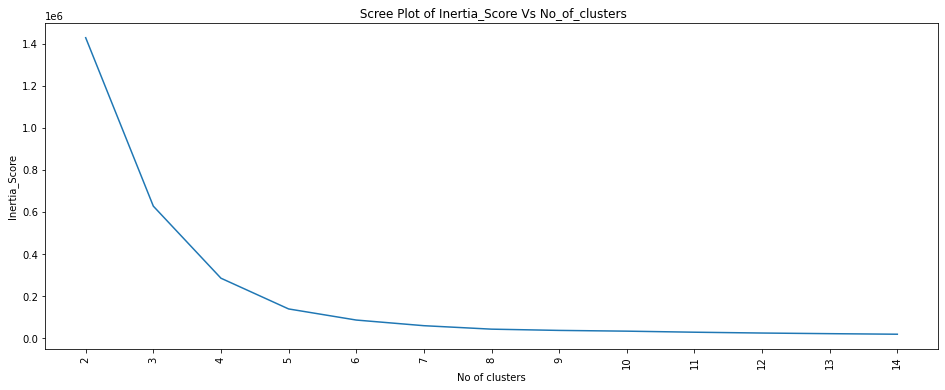

In [19]:
# Plotting Scree Plot to decide the optimal number of clusters 

fig, (ax)=plt.subplots(1,figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax.plot(xx,inertia)
ax.set_xticks(xx)
ax.set_xticklabels(no_of_clusters,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia_Score")
plt.title(" Scree Plot of Inertia_Score Vs No_of_clusters")

In [20]:
# From the scree plot, we see that maximum rate of change occurs at cluster =4
# Running KMeans on 4 clusters 
kmeans = KMeans(n_clusters=4, n_init=2, random_state=1000)
kmeans.fit(data2)

KMeans(n_clusters=4, n_init=2, random_state=1000)

In [21]:
#Creating a dataframe 
df_counts=pd.DataFrame(counts, columns=["Cluster1","Cluster2"," Cluster3", "Cluster4"])
df_counts

,Cluster1,Cluster2,Cluster3,Cluster4
0,2638,8012,2330,6883


In [22]:
# Adding the cluster_label column in the main dataset data1 which has all the variables but only the clicked keywords 

data1['Cluster_id']=kmeans.labels_
data1.head()

<ipython-input-22-17021c50cc44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Cluster_id']=kmeans.labels_


,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,5,77.15,15.43,0.089286,0.0,0.0,11,45,1
1,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,1,18.77,18.77,0.052632,0.0,1.0,11,45,1
2,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,1,11.77,11.77,0.333333,0.0,0.0,11,45,1
3,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,1,9.98,9.98,0.500000,0.0,0.0,11,45,3
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,0,1,19.77,19.77,0.055556,0.0,0.0,11,45,0


In [23]:
data1.shape

(19863, 32)

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19863 entries, 0 to 72988
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   All_networks_keywords     13324 non-null  object        
 1   All_networks_keywords1    19863 non-null  object        
 2   Keywords_cl               19863 non-null  object        
 3   Date                      19863 non-null  datetime64[ns]
 4   Year                      19863 non-null  int64         
 5   Day_of_week               19863 non-null  int64         
 6   Root_Unique_id            19863 non-null  int64         
 7   Unique_keyword_id         19863 non-null  int64         
 8   Broad_match               19863 non-null  int64         
 9   Narrow_match              19863 non-null  int64         
 10  Generic                   19863 non-null  int64         
 11  Full_time_MBA             19863 non-null  int64         
 12  Part time         

# Finding the keywords in each cluster 

In [25]:
# Keywords-Clusterid=1
df_keyword1 = data1[data1["Cluster_id"] == 0]
df_keyword1.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,0,1,19.77,19.77,0.055556,0.0,0.0,11,45,0
5,NaN,=+@mba +@professional,+MBA +PROFESSIONAL,2019-11-07,1,4,37,238,0,1,...,0,1,19.78,19.78,0.066667,0.0,0.0,11,45,0
87,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-08,1,5,34,221,0,1,...,0,1,14.74,14.74,0.250000,0.0,0.0,11,45,0
88,NaN,=+@pmba +@degree,+PMBA +DEGREE,2019-11-08,1,5,34,329,0,1,...,0,1,19.20,19.20,0.250000,0.0,0.0,11,45,0
163,NaN,=+@mba +@professional,+MBA +PROFESSIONAL,2019-11-09,1,6,37,238,0,1,...,0,1,18.67,18.67,0.142857,0.0,0.0,11,45,0


In [26]:
df_keyword1.shape

(2638, 32)

In [29]:
#Keywords-Clusterid=2

df_keyword2 = data1[data1["Cluster_id"] == 1]
df_keyword2.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,5,77.15,15.430,0.089286,0.0,0.0,11,45,1
1,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,1,18.77,18.770,0.052632,0.0,1.0,11,45,1
2,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,1,11.77,11.770,0.333333,0.0,0.0,11,45,1
79,mba,mba,MBA,2019-11-08,1,5,1,1,1,0,...,0,5,89.64,17.928,0.090909,0.0,0.0,11,45,1
80,emba,emba,EMBA,2019-11-08,1,5,2,124,1,0,...,0,2,37.31,18.655,0.080000,0.0,0.0,11,45,1


In [30]:
df_keyword2.shape

(8012, 32)

In [31]:
# Keywords-Clusterid=3

df_keyword3 = data1[data1["Cluster_id"] == 2]
df_keyword3.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
6,mays business school,mays business school,MAYS BUSINESS SCHOOL,2019-11-07,1,4,52,5,1,0,...,0,1,9.58,9.58,0.166667,0.0,0.0,11,45,2
7,NaN,=+@mays +@business +@school,+MAYS +BUSINESS +SCHOOL,2019-11-07,1,4,52,57,0,1,...,0,1,5.72,5.72,0.100000,0.0,0.0,11,45,2
83,mays business school,mays business school,MAYS BUSINESS SCHOOL,2019-11-08,1,5,52,5,1,0,...,0,2,9.26,4.63,0.250000,0.0,0.0,11,45,2
89,NaN,=+@mays +@business +@school,+MAYS +BUSINESS +SCHOOL,2019-11-08,1,5,52,57,0,1,...,0,1,10.00,10.00,0.083333,0.0,0.0,11,45,2
164,mays business school,mays business school,MAYS BUSINESS SCHOOL,2019-11-09,1,6,52,5,1,0,...,0,1,1.81,1.81,0.076923,0.0,0.0,11,45,2


In [32]:
df_keyword3.shape

(2330, 32)

In [63]:
#df_keyword3_uniq = df_keyword3.drop_duplicates(subset='Keywords_cl', keep='first')
#df_keyword3_uniq.head()
#df_keyword3_uniq.shape

(113, 32)

In [33]:
# Keywords-Clusterid=0

df_keyword4 = data1[data1["Cluster_id"] == 3]
df_keyword4.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
3,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,1,9.98,9.980,0.500000,0.0,0.0,11,45,3
86,a&m mba,a&m mba,A&M MBA,2019-11-08,1,5,12,7,1,0,...,0,1,9.45,9.450,1.000000,0.0,0.0,11,45,3
161,NaN,=+@tamu +@business +@school,+TAMU +BUSINESS +SCHOOL,2019-11-09,1,6,12,222,0,1,...,0,1,6.33,6.330,0.333333,0.0,0.0,11,45,3
162,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-09,1,6,16,50,0,1,...,0,1,9.52,9.520,0.333333,0.0,0.0,11,45,3
238,NaN,=+@Texas +@a&@m +@mba,+TEXAS +A&M +MBA,2019-11-10,1,0,12,48,0,1,...,0,2,19.19,9.595,1.000000,0.0,0.0,11,45,3


In [34]:
df_keyword4.shape

(6883, 32)

In [65]:
#df_keyword4_uniq = df_keyword4.drop_duplicates(subset='Keywords_cl', keep='first')
#df_keyword4_uniq.head()
#df_keyword4_uniq.shape

(62, 32)

# Exporting the files with different cluster id - 0,1,2,3 

In [216]:
file_name = 'Keywords_Clusterid_0.xlsx'
df_keyword1.to_excel(file_name)

In [217]:
file_name = 'Keywords_Clusterid_1.xlsx'
df_keyword2.to_excel(file_name)

In [218]:
file_name = 'Keywords_Clusterid_2.xlsx'
df_keyword3.to_excel(file_name)

In [219]:
file_name = 'Keywords_Clusterid_3.xlsx'
df_keyword4.to_excel(file_name)

# Exporting unique keywords corresponding to Cluster_id to excel 

In [788]:
#file_name = 'Unique_Keywords_Clusterid_0.xlsx'
#df_keyword1_uniq.to_excel(file_name)

In [789]:
#file_name = 'Unique_Keywords_Clusterid_1.xlsx'
#df_keyword2_uniq.to_excel(file_name)

In [790]:
#file_name = 'Unique_Keywords_Clusterid_2.xlsx'
#df_keyword3_uniq.to_excel(file_name)

In [791]:
#file_name = 'Unique_Keywords_Clusterid_3.xlsx'
#df_keyword3_uniq.to_excel(file_name)

# Finding the mean, min and max of the unique keywords 

In [35]:
#Finding the mean, min, max of CPC for cluster_id=0

df_mean0=df_keyword1.groupby('Keywords_cl').mean('CPC')
df_mean0.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+MBA +FOR +PROFESSIONALS,1.40000,4.000000,37.0,387.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,28.844000,28.844000,0.740000,0.0,0.000000,3.200000,12.200000,0
+MBA +PART +TIME +SCHOOL,1.00000,3.500000,39.0,403.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.000000,18.400000,18.400000,0.625000,0.0,0.000000,6.500000,27.000000,0
+MBA +PROFESSIONAL,1.22449,2.938776,37.0,238.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.142857,24.790408,22.302279,0.192164,0.0,0.013605,4.795918,19.265306,0
+MBA +PROFESSIONAL +COLLEGE,1.00000,2.000000,37.0,427.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,23.510000,23.510000,1.000000,0.0,0.000000,12.000000,51.000000,0
+MBA +PROFESSIONAL +DEGREE,2.00000,1.000000,37.0,327.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,28.520000,28.520000,0.083333,0.0,0.000000,1.000000,4.000000,0


In [36]:
df_min0=df_keyword1.groupby('Keywords_cl').min('CPC')
df_min0.shape

(78, 28)

In [37]:
df_max0=df_keyword1.groupby('Keywords_cl').max('CPC')

In [38]:
df_mean0.shape  # There are 141 keywords for the cluster_id=0

(78, 28)

In [39]:
#Finding the mean, min, max of CPC for cluster_id=1
df_mean1=df_keyword2.groupby('Keywords_cl').mean('CPC')
df_mean1.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+BEST +EXECUTIVE +MBA,2.000000,3.333333,2.0,262.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,12.140000,12.140000,1.000000,0.000000,0.000000,3.666667,15.00000,1
+BEST +EXECUTIVE +MBA +UNIVERSITY,3.000000,6.000000,2.0,263.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,15.600000,15.600000,1.000000,0.000000,0.000000,10.000000,39.00000,1
+BEST +FULL +TIME +MBA,1.000000,6.000000,3.0,291.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.000000,9.260000,9.260000,1.000000,0.000000,0.000000,12.000000,51.00000,1
+EMBA,2.293447,2.951567,2.0,21.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,2.122507,36.365954,17.826408,0.032955,0.044956,0.038481,5.524217,21.91453,1
+EMBA +ADMISSION,1.000000,1.000000,2.0,287.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,19.830000,19.830000,0.500000,0.000000,0.000000,12.000000,52.00000,1


In [40]:
df_min1=df_keyword2.groupby('Keywords_cl').min('CPC')
df_min1.shape

(141, 28)

In [41]:
df_max1=df_keyword2.groupby('Keywords_cl').max('CPC')

In [42]:
df_mean1.shape # There are 141 unique keywords for cluster_id=1

(141, 28)

In [43]:
#Finding the mean, min, max of CPC for cluster_id=2

df_mean2=df_keyword3.groupby('Keywords_cl').mean('CPC')
df_mean2.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+BEST +PMBA,2.000000,1.000000,52.0,441.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,28.050000,28.050000,1.000000,0.000000,0.000000,1.000000,3.000000,2
+EVENING +MBA,1.000000,2.500000,50.0,383.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.166667,32.203333,27.318333,0.441667,0.000000,0.000000,6.333333,26.000000,2
+EVENING +MBA +UNIVERSITY,1.000000,6.000000,50.0,437.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,13.100000,13.100000,0.500000,0.000000,0.000000,12.000000,52.000000,2
+MAYS +BUSINESS +COLLEGE,2.753731,2.798507,52.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.119403,5.886045,2.879931,0.272791,1.038775,0.054975,6.865672,27.835821,2
+MAYS +BUSINESS +SCHOOL,1.566540,3.019011,52.0,57.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.429658,23.862624,3.714695,0.101669,0.277231,0.073489,4.536122,17.437262,2


In [44]:
df_min2=df_keyword3.groupby('Keywords_cl').min('CPC')

In [45]:
df_max2=df_keyword3.groupby('Keywords_cl').max('CPC')

In [46]:
df_mean2.shape # There are 62 unique keywords for cluster_id=2

(62, 28)

In [47]:
#Finding the mean, min, max of CPC for cluster_id=3

df_mean3=df_keyword4.groupby('Keywords_cl').mean('CPC')
df_mean3.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+A&M +BUSINESS +ADMINISTRATION,1.60000,2.850000,16.0,191.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.225000,5.746750,4.652875,0.581101,1.736524,0.112500,2.900000,10.925000,3
+A&M +BUSINESS +ADMINISTRATION +DEGREE,1.00000,4.000000,16.0,420.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,9.580000,9.580000,1.000000,0.000000,0.000000,11.000000,47.000000,3
+A&M +BUSINESS +COLLEGE,1.00000,2.666667,16.0,384.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,8.256667,8.256667,0.625000,0.000000,0.000000,8.833333,36.166667,3
+A&M +BUSINESS +SCHOOL,1.54902,2.849673,16.0,121.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.111111,10.162745,4.821780,0.145516,0.001989,0.064052,3.627451,13.967320,3
+A&M +BUSINESS +UNIVERSITY,2.41791,2.850746,16.0,42.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.410448,3.863134,2.895801,0.287918,0.545157,0.070149,5.708955,23.119403,3


In [48]:
df_min3=df_keyword4.groupby('Keywords_cl').min('CPC')
df_min3.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+A&M +BUSINESS +ADMINISTRATION,1,0,16,191,0,1,0,0,0,0,...,0,1,1.68,1.68,0.125000,0.0,0.0,1,2,3
+A&M +BUSINESS +ADMINISTRATION +DEGREE,1,4,16,420,0,1,0,0,0,0,...,0,1,9.58,9.58,1.000000,0.0,0.0,11,47,3
+A&M +BUSINESS +COLLEGE,1,0,16,384,0,1,0,0,0,0,...,0,1,2.66,2.66,0.250000,0.0,0.0,3,9,3
+A&M +BUSINESS +SCHOOL,1,0,16,121,0,1,0,0,0,0,...,0,1,0.39,0.39,0.016393,0.0,0.0,1,1,3
+A&M +BUSINESS +UNIVERSITY,1,0,16,42,0,1,1,0,0,0,...,0,1,0.34,0.34,0.047619,0.0,0.0,1,1,3


In [49]:
df_max3=df_keyword4.groupby('Keywords_cl').max('CPC')
df_max3.head()

,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,Part time,Exec_MBA,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
Keywords_cl,,,,,,,,,,,,,,,,,,,,,
+A&M +BUSINESS +ADMINISTRATION,3,6,16,191,0,1,0,0,0,0,...,0,4,25.42,10.52,1.0,59.760956,1.0,12,52,3
+A&M +BUSINESS +ADMINISTRATION +DEGREE,1,4,16,420,0,1,0,0,0,0,...,0,1,9.58,9.58,1.0,0.000000,0.0,11,47,3
+A&M +BUSINESS +COLLEGE,1,5,16,384,0,1,0,0,0,0,...,0,1,10.94,10.94,1.0,0.000000,0.0,12,51,3
+A&M +BUSINESS +SCHOOL,3,6,16,121,0,1,0,0,0,0,...,0,7,33.39,14.03,1.0,0.200938,1.0,12,52,3
+A&M +BUSINESS +UNIVERSITY,3,6,16,42,0,1,1,0,0,0,...,0,5,14.02,10.86,1.0,34.965035,1.0,12,52,3


In [50]:
df_mean3.shape # There are 113 unique keywords in the cluster_id=3

(113, 28)

In [203]:
# Exporting the dataframes to excel having average, min and max CPC 

In [204]:
file_name = 'Unique_Keywords_mean_Clusterid_0.xlsx'
df_mean0.to_excel(file_name)

In [205]:
file_name = 'Unique_Keywords_min_Clusterid_0.xlsx'
df_min0.to_excel(file_name)

In [206]:
file_name = 'Unique_Keywords_max_Clusterid_0.xlsx'
df_max0.to_excel(file_name)

In [207]:
file_name = 'Unique_Keywords_mean_Clusterid_1.xlsx'
df_mean1.to_excel(file_name)

In [208]:
file_name = 'Unique_Keywords_min_Clusterid_1.xlsx'
df_min1.to_excel(file_name)

In [209]:
file_name = 'Unique_Keywords_max_Clusterid_1.xlsx'
df_max1.to_excel(file_name)

In [210]:
file_name = 'Unique_Keywords_mean_Clusterid_2.xlsx'
df_mean2.to_excel(file_name)

In [211]:
file_name = 'Unique_Keywords_min_Clusterid_2.xlsx'
df_min2.to_excel(file_name)

In [212]:
file_name = 'Unique_Keywords_max_Clusterid_2.xlsx'
df_max2.to_excel(file_name)

In [213]:
file_name = 'Unique_Keywords_mean_Clusterid_3.xlsx'
df_mean3.to_excel(file_name)

In [214]:
file_name = 'Unique_Keywords_min_Clusterid_3.xlsx'
df_min3.to_excel(file_name)

In [215]:
file_name = 'Unique_Keywords_max_Clusterid_3.xlsx'
df_max3.to_excel(file_name)

# Finding Mean, Minimum, Maximum of each keyword week_wise 

In [51]:
df_keyword1.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month,week_number,Cluster_id
4,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,0,1,19.77,19.77,0.055556,0.0,0.0,11,45,0
5,NaN,=+@mba +@professional,+MBA +PROFESSIONAL,2019-11-07,1,4,37,238,0,1,...,0,1,19.78,19.78,0.066667,0.0,0.0,11,45,0
87,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-08,1,5,34,221,0,1,...,0,1,14.74,14.74,0.250000,0.0,0.0,11,45,0
88,NaN,=+@pmba +@degree,+PMBA +DEGREE,2019-11-08,1,5,34,329,0,1,...,0,1,19.20,19.20,0.250000,0.0,0.0,11,45,0
163,NaN,=+@mba +@professional,+MBA +PROFESSIONAL,2019-11-09,1,6,37,238,0,1,...,0,1,18.67,18.67,0.142857,0.0,0.0,11,45,0


In [52]:
df_keyword1.columns

Index(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Day_of_week', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'month', 'week_number',
       'Cluster_id'],
      dtype='object')

# Analysis Week_wise- Finding mean, min and max of CPC, CTR and Cost 

In [95]:
# Cluster_id0

result_0 = df_keyword1.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])
result_0.head()

<ipython-input-95-92184df544dc>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_0 = df_keyword1.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])


CPC  \
                                                                  mean   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520000   
                  66                A&M EXECUTIVE MBA         7.075000   
                  86                RICE EXECUTIVE MBA       19.730000   
                  90                PROFESSIONAL MBA         25.745000   
                  105               PMBA                     18.786667   

                                                                             \
                                                                min     max   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520   9.520   
                  66                A&M EXECUTIVE MBA         7.075   7.075   
                  86                RICE EXECUTIVE MBA       19.730  19.730   
                  90                PROFESSIONAL MBA         22.780  28.710   
                  105               PMBA                      2.230  29.980   

                                                                  Cost         \
                                                                  mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                 
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520000   9.52   
                  66                A&M EXECUTIVE MBA        28.300000  28.30   
                  86                RICE EXECUTIVE MBA       39.460000  39.46   
                  90                PROFESSIONAL MBA         25.745000  22.78   
                  105               PMBA                     18.786667   2.23   

                                                                         CTR  \
                                                               max      mean   
Year  week_number Unique_keyword_id Keywords_cl                                
1     1           35                TEXAS A&M EXECUTIVE MBA   9.52  1.000000   
                  66                A&M EXECUTIVE MBA        28.30  2.000000   
                  86                RICE EXECUTIVE MBA       39.46  1.000000   
                  90                PROFESSIONAL MBA         28.71  0.562500   
                  105               PMBA                     29.98  0.108081   

                                                                       \
                                                                  min   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           35                TEXAS A&M EXECUTIVE MBA  1.000000   
                  66                A&M EXECUTIVE MBA        2.000000   
                  86                RICE EXECUTIVE MBA       1.000000   
                  90                PROFESSIONAL MBA         0.125000   
                  105               PMBA                     0.066667   

                                                                       
                                                                  max  
Year  week_number Unique_keyword_id Keywords_cl                        
1     1           35                TEXAS A&M EXECUTIVE MBA  1.000000  
                  66                A&M EXECUTIVE MBA        2.000000  
                  86                RICE EXECUTIVE MBA       1.000000  
                  90                PROFESSIONAL MBA         1.000000  
                  105               PMBA                     0.166667

In [97]:
type(result_0)

pandas.core.frame.DataFrame

In [98]:
result_0.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1338 entries, (1, 1, 35, 'TEXAS A&M EXECUTIVE MBA') to (3, 52, 145, 'TEXAS A&M BUSINESS ADMINISTRATION DEGREE')
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (CPC, mean)   1338 non-null   float64
 1   (CPC, min)    1338 non-null   float64
 2   (CPC, max)    1338 non-null   float64
 3   (Cost, mean)  1338 non-null   float64
 4   (Cost, min)   1338 non-null   float64
 5   (Cost, max)   1338 non-null   float64
 6   (CTR, mean)   1338 non-null   float64
 7   (CTR, min)    1338 non-null   float64
 8   (CTR, max)    1338 non-null   float64
dtypes: float64(9)
memory usage: 101.2+ KB


In [99]:
result_0.columns

MultiIndex([( 'CPC', 'mean'),
            ( 'CPC',  'min'),
            ( 'CPC',  'max'),
            ('Cost', 'mean'),
            ('Cost',  'min'),
            ('Cost',  'max'),
            ( 'CTR', 'mean'),
            ( 'CTR',  'min'),
            ( 'CTR',  'max')],
           )

# Creating a new metric ('CTR_mean/Cost_mean')

In [100]:
result_0["CTR_mean/Cost_mean"]= result_0['CTR', 'mean']/result_0['Cost', 'mean']
result_0.head()

CPC  \
                                                                  mean   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520000   
                  66                A&M EXECUTIVE MBA         7.075000   
                  86                RICE EXECUTIVE MBA       19.730000   
                  90                PROFESSIONAL MBA         25.745000   
                  105               PMBA                     18.786667   

                                                                             \
                                                                min     max   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520   9.520   
                  66                A&M EXECUTIVE MBA         7.075   7.075   
                  86                RICE EXECUTIVE MBA       19.730  19.730   
                  90                PROFESSIONAL MBA         22.780  28.710   
                  105               PMBA                      2.230  29.980   

                                                                  Cost         \
                                                                  mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                 
1     1           35                TEXAS A&M EXECUTIVE MBA   9.520000   9.52   
                  66                A&M EXECUTIVE MBA        28.300000  28.30   
                  86                RICE EXECUTIVE MBA       39.460000  39.46   
                  90                PROFESSIONAL MBA         25.745000  22.78   
                  105               PMBA                     18.786667   2.23   

                                                                         CTR  \
                                                               max      mean   
Year  week_number Unique_keyword_id Keywords_cl                                
1     1           35                TEXAS A&M EXECUTIVE MBA   9.52  1.000000   
                  66                A&M EXECUTIVE MBA        28.30  2.000000   
                  86                RICE EXECUTIVE MBA       39.46  1.000000   
                  90                PROFESSIONAL MBA         28.71  0.562500   
                  105               PMBA                     29.98  0.108081   

                                                                       \
                                                                  min   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           35                TEXAS A&M EXECUTIVE MBA  1.000000   
                  66                A&M EXECUTIVE MBA        2.000000   
                  86                RICE EXECUTIVE MBA       1.000000   
                  90                PROFESSIONAL MBA         0.125000   
                  105               PMBA                     0.066667   

                                                                       \
                                                                  max   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           35                TEXAS A&M EXECUTIVE MBA  1.000000   
                  66                A&M EXECUTIVE MBA        2.000000   
                  86                RICE EXECUTIVE MBA       1.000000   
                  90                PROFESSIONAL MBA         1.000000   
                  105               PMBA                     0.166667   

                                                            CTR_mean/Cost_mean  
                                                                                
Year  week_number Unique_keyword_id Keywords_cl                                 
1     1           35                TEXAS A&M EXECUTIVE MBA           0.105042  
                  66                A&M EXECUTIVE MBA    

In [101]:
# Sorting the new metric (CTR_mean/Cost_mean) 
#result_0.groupby(['Unique_keyword_id']).apply(lambda x: x.sort_values(['CTR_mean/Cost_mean'], ascending=False)
                

In [102]:
#res = result_0.apply(lambda x: x.sort_values(ascending=False)

In [130]:
#Sorting of the new metric "CTR_mean/Cost_mean" using apply function after in conjunction with groupby function 

result_0_sort=result_0.groupby(["Year ", "week_number" ]).apply(lambda x: x.sort_values(["CTR_mean/Cost_mean"], ascending = False))
result_0_sort.head()

CPC  \
                                                                                 mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                       
1     1           1     1           180               +TAMU +PMBA               9.220   
                                    211               +TAMU +EMBA               9.370   
                                    35                TEXAS A&M EXECUTIVE MBA   9.520   
                                    242               +TAMU +EXECUTIVE +MBA    11.275   
                                    66                A&M EXECUTIVE MBA         7.075   

                                                                                      \
                                                                                 min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                      
1     1           1     1           180               +TAMU +PMBA              9.220   
                                    211               +TAMU +EMBA              9.370   
                                    35                TEXAS A&M EXECUTIVE MBA  9.520   
                                    242               +TAMU +EXECUTIVE +MBA    9.950   
                                    66                A&M EXECUTIVE MBA        7.075   

                                                                                       \
                                                                                  max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                       
1     1           1     1           180               +TAMU +PMBA               9.220   
                                    211               +TAMU +EMBA               9.370   
                                    35                TEXAS A&M EXECUTIVE MBA   9.520   
                                    242               +TAMU +EXECUTIVE +MBA    12.600   
                                    66                A&M EXECUTIVE MBA         7.075   

                                                                                 Cost  \
                                                                                 mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                       
1     1           1     1           180               +TAMU +PMBA               9.220   
                                    211               +TAMU +EMBA               9.370   
                                    35                TEXAS A&M EXECUTIVE MBA   9.520   
                                    242               +TAMU +EXECUTIVE +MBA    11.275   
                                    66                A&M EXECUTIVE MBA        28.300   

                                                                                      \
                                                                                 min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                      
1     1           1     1           180               +TAMU +PMBA               9.22   
                                    211               +TAMU +EMBA               9.37   
                                    35                TEXAS A&M EXECUTIVE MBA   9.52   
                                    242               +TAMU +EXECUTIVE +MBA     9.95   
                                    66                A&M EXECUTIVE MBA        28.30   

                                                                                      \
                                                                                 max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                      
1     1           1     1           180               +TAMU +PMBA               9.22   
                                    211               +TAMU +EMBA               9.37   
                                    35                TEXAS A&M EXECUTIVE MBA   9.52   
     

# Total cost of the keywords weekwise- Clusterid0

In [148]:
#result_0_cost = df_keyword1.groupby(['Year ','week_number','Unique_keyword_id', 'Keywords_cl'])['Cost'].agg('sum')
#result_0_cost.head()

In [149]:
# Cost of the keywords weekwise for clusterid-0 

result_0_cost = df_keyword1.groupby(['Year ','week_number','Unique_keyword_id','Keywords_cl' ])['Cost'].agg('sum')
result_0_cost

Year   week_number  Unique_keyword_id  Keywords_cl                             
1      1            35                 TEXAS A&M EXECUTIVE MBA                       9.52
                    66                 A&M EXECUTIVE MBA                            28.30
                    86                 RICE EXECUTIVE MBA                           39.46
                    90                 PROFESSIONAL MBA                             51.49
                    105                PMBA                                         56.36
                                                                                    ...  
3      52           39                 TEXAS A&M EMBA                               74.00
                    54                 RICE PMBA                                   140.35
                    81                 TEXAS A&M EXECUTIVE MBA COST                  3.60
                    86                 RICE EXECUTIVE MBA                           46.19
                    

In [158]:
# Converting the series to dataframe
df_result_0_cost=pd.DataFrame(result_0_cost)

In [63]:
# Cluster_id1

result_1 = df_keyword2.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])
result_1.head()

<ipython-input-63-1a04bdc919db>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_1 = df_keyword2.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])


CPC             \
                                                      mean        min   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           1                 MBA           8.270266   7.579167   
                  4                 MBA PROGRAM   9.151667   8.483333   
                  11                MBA SCHOOL    9.620000   9.620000   
                  13                +MBA          8.802758   7.728750   
                  21                +EMBA        16.404167  11.020000   

                                                                 Cost         \
                                                       max       mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                
1     1           1                 MBA           9.150556  96.220000  53.41   
                  4                 MBA PROGRAM   9.820000  17.635000   9.82   
                  11                MBA SCHOOL    9.620000   9.620000   9.62   
                  13                +MBA          9.666667  68.540000  28.91   
                  21                +EMBA        19.375000  22.131667  11.02   

                                                              CTR            \
                                                    max      mean       min   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           1                 MBA          164.71  0.021358  0.010292   
                  4                 MBA PROGRAM   25.45  0.258929  0.142857   
                  11                MBA SCHOOL     9.62  0.250000  0.250000   
                  13                +MBA         120.77  0.018874  0.009615   
                  21                +EMBA         38.75  0.031987  0.013699   

                                                           
                                                      max  
Year  week_number Unique_keyword_id Keywords_cl            
1     1           1                 MBA          0.047059  
                  4                 MBA PROGRAM  0.375000  
                  11                MBA SCHOOL   0.250000  
                  13                +MBA         0.023810  
                  21                +EMBA        0.046512

In [64]:
result_1["CTR_mean/Cost_mean"]= result_1['CTR', 'mean']/result_1['Cost', 'mean']
result_1.head()

CPC             \
                                                      mean        min   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           1                 MBA           8.270266   7.579167   
                  4                 MBA PROGRAM   9.151667   8.483333   
                  11                MBA SCHOOL    9.620000   9.620000   
                  13                +MBA          8.802758   7.728750   
                  21                +EMBA        16.404167  11.020000   

                                                                 Cost         \
                                                       max       mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                
1     1           1                 MBA           9.150556  96.220000  53.41   
                  4                 MBA PROGRAM   9.820000  17.635000   9.82   
                  11                MBA SCHOOL    9.620000   9.620000   9.62   
                  13                +MBA          9.666667  68.540000  28.91   
                  21                +EMBA        19.375000  22.131667  11.02   

                                                              CTR            \
                                                    max      mean       min   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           1                 MBA          164.71  0.021358  0.010292   
                  4                 MBA PROGRAM   25.45  0.258929  0.142857   
                  11                MBA SCHOOL     9.62  0.250000  0.250000   
                  13                +MBA         120.77  0.018874  0.009615   
                  21                +EMBA         38.75  0.031987  0.013699   

                                                          CTR_mean/Cost_mean  
                                                      max                     
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           1                 MBA          0.047059           0.000222  
                  4                 MBA PROGRAM  0.375000           0.014683  
                  11                MBA SCHOOL   0.250000           0.025988  
                  13                +MBA         0.023810           0.000275  
                  21                +EMBA        0.046512           0.001445

In [129]:
#Sorting of the new metric "CTR_mean/Cost_mean" using apply function after in conjunction with groupby function 

result_1_sort=result_1.groupby(["Year ", "week_number" ]).apply(lambda x: x.sort_values(["CTR_mean/Cost_mean"], ascending = False))
result_1_sort.head()

CPC  \
                                                                                      mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46                MBA COLLEGE                     9.76   
                                    305               +EXECUTIVE +MBA +SCHOOL        11.86   
                                    223               +WHAT +IS +AN +MBA +DEGREE      8.45   
                                    340               +WHAT +IS +A +FULL +TIME +MBA  18.71   
                                    65                MBA REQUIREMENTS                9.95   

                                                                                            \
                                                                                       min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46                MBA COLLEGE                     9.76   
                                    305               +EXECUTIVE +MBA +SCHOOL        11.86   
                                    223               +WHAT +IS +AN +MBA +DEGREE      8.45   
                                    340               +WHAT +IS +A +FULL +TIME +MBA  18.71   
                                    65                MBA REQUIREMENTS                9.95   

                                                                                            \
                                                                                       max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46                MBA COLLEGE                     9.76   
                                    305               +EXECUTIVE +MBA +SCHOOL        11.86   
                                    223               +WHAT +IS +AN +MBA +DEGREE      8.45   
                                    340               +WHAT +IS +A +FULL +TIME +MBA  18.71   
                                    65                MBA REQUIREMENTS                9.95   

                                                                                      Cost  \
                                                                                      mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46                MBA COLLEGE                     9.76   
                                    305               +EXECUTIVE +MBA +SCHOOL        11.86   
                                    223               +WHAT +IS +AN +MBA +DEGREE      8.45   
                                    340               +WHAT +IS +A +FULL +TIME +MBA  18.71   
                                    65                MBA REQUIREMENTS                9.95   

                                                                                            \
                                                                                       min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46                MBA COLLEGE                     9.76   
                                    305               +EXECUTIVE +MBA +SCHOOL        11.86   
                                    223               +WHAT +IS +AN +MBA +DEGREE      8.45   
                                    340               +WHAT +IS +A +FULL +TIME +MBA  18.71   
                                    65                MBA REQUIREMENTS                9.95   

                                                                                            \
                                                                                       max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                            
1     1           1     1           46  

# Total Cost of keywords weekwise-  Clusterid1 

In [147]:
# Money spent week-wise on clusterid1

#result_1_cost = df_keyword2.groupby(['Year ','week_number'])['Cost'].agg('sum')
#result_1_cost

In [150]:
# Cost of the keywords weekwise for clusterid-1

result_1_cost = df_keyword2.groupby(['Year ','week_number','Unique_keyword_id','Keywords_cl' ])['Cost'].agg('sum')
result_1_cost

Year   week_number  Unique_keyword_id  Keywords_cl                
1      1            1                  MBA                            673.54
                    4                  MBA PROGRAM                     35.27
                    11                 MBA SCHOOL                       9.62
                    13                 +MBA                           479.78
                    21                 +EMBA                          132.79
                                                                       ...  
3      52           84                 +MBA +EXECUTIVE +UNIVERSITY     21.45
                    99                 FTMBA                           18.92
                    104                FULL TIME MBA COLLEGE           36.71
                    109                EMBA EXECUTIVE                  35.98
                    148                EMBA ADMISSION                  10.13
Name: Cost, Length: 2631, dtype: float64

In [155]:
type(result_1_cost)

pandas.core.series.Series

In [156]:
# Series to Dataframe 
df_result_1_cost=pd.DataFrame(result_1_cost)

In [67]:
# Cluster_id2

result_2 = df_keyword3.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])
result_2.head()

<ipython-input-67-5f4c81426f92>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_2 = df_keyword3.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])


CPC  \
                                                                   mean   
Year  week_number Unique_keyword_id Keywords_cl                           
1     1           5                 MAYS BUSINESS SCHOOL       5.409728   
                  28                +MAYS +BUSINESS +COLLEGE   3.700000   
                  40                MAYS MBA                   3.550000   
                  43                MCCOMBS EXECUTIVE MBA     10.920000   
                  56                MCCOMBS EMBA              19.360000   

                                                                             \
                                                                min     max   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           5                 MAYS BUSINESS SCHOOL       4.20   9.135   
                  28                +MAYS +BUSINESS +COLLEGE   3.70   3.700   
                  40                MAYS MBA                   2.23   4.870   
                  43                MCCOMBS EXECUTIVE MBA     10.92  10.920   
                  56                MCCOMBS EMBA              19.36  19.360   

                                                                   Cost  \
                                                                   mean   
Year  week_number Unique_keyword_id Keywords_cl                           
1     1           5                 MAYS BUSINESS SCHOOL      35.447143   
                  28                +MAYS +BUSINESS +COLLEGE   3.700000   
                  40                MAYS MBA                   3.550000   
                  43                MCCOMBS EXECUTIVE MBA     10.920000   
                  56                MCCOMBS EMBA              19.360000   

                                                                            \
                                                                min    max   
Year  week_number Unique_keyword_id Keywords_cl                              
1     1           5                 MAYS BUSINESS SCHOOL       9.72  73.08   
                  28                +MAYS +BUSINESS +COLLEGE   3.70   3.70   
                  40                MAYS MBA                   2.23   4.87   
                  43                MCCOMBS EXECUTIVE MBA     10.92  10.92   
                  56                MCCOMBS EMBA              19.36  19.36   

                                                                   CTR  \
                                                                  mean   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           5                 MAYS BUSINESS SCHOOL      0.096747   
                  28                +MAYS +BUSINESS +COLLEGE  0.500000   
                  40                MAYS MBA                  0.750000   
                  43                MCCOMBS EXECUTIVE MBA     1.000000   
                  56                MCCOMBS EMBA              0.333333   

                                                                        \
                                                                   min   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           5                 MAYS BUSINESS SCHOOL      0.030303   
                  28                +MAYS +BUSINESS +COLLEGE  0.500000   
                  40                MAYS MBA                  0.500000   
                  43                MCCOMBS EXECUTIVE MBA     1.000000   
                  56                MCCOMBS EMBA              0.333333   

                                                                        
                                                                   max  
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           5                 MAYS BUSINESS SCHOOL      0.146341  
                  28                +MAYS +BUSINESS +COLLEGE  0.500000  
                  40                MAYS MBA             

In [72]:

result_2["CTR_mean/Cost_mean"]= result_2['CTR', 'mean']/result_2['Cost', 'mean']
result_2.head()

CPC  \
                                                                   mean   
Year  week_number Unique_keyword_id Keywords_cl                           
1     1           5                 MAYS BUSINESS SCHOOL       5.409728   
                  28                +MAYS +BUSINESS +COLLEGE   3.700000   
                  40                MAYS MBA                   3.550000   
                  43                MCCOMBS EXECUTIVE MBA     10.920000   
                  56                MCCOMBS EMBA              19.360000   

                                                                             \
                                                                min     max   
Year  week_number Unique_keyword_id Keywords_cl                               
1     1           5                 MAYS BUSINESS SCHOOL       4.20   9.135   
                  28                +MAYS +BUSINESS +COLLEGE   3.70   3.700   
                  40                MAYS MBA                   2.23   4.870   
                  43                MCCOMBS EXECUTIVE MBA     10.92  10.920   
                  56                MCCOMBS EMBA              19.36  19.360   

                                                                   Cost  \
                                                                   mean   
Year  week_number Unique_keyword_id Keywords_cl                           
1     1           5                 MAYS BUSINESS SCHOOL      35.447143   
                  28                +MAYS +BUSINESS +COLLEGE   3.700000   
                  40                MAYS MBA                   3.550000   
                  43                MCCOMBS EXECUTIVE MBA     10.920000   
                  56                MCCOMBS EMBA              19.360000   

                                                                            \
                                                                min    max   
Year  week_number Unique_keyword_id Keywords_cl                              
1     1           5                 MAYS BUSINESS SCHOOL       9.72  73.08   
                  28                +MAYS +BUSINESS +COLLEGE   3.70   3.70   
                  40                MAYS MBA                   2.23   4.87   
                  43                MCCOMBS EXECUTIVE MBA     10.92  10.92   
                  56                MCCOMBS EMBA              19.36  19.36   

                                                                   CTR  \
                                                                  mean   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           5                 MAYS BUSINESS SCHOOL      0.096747   
                  28                +MAYS +BUSINESS +COLLEGE  0.500000   
                  40                MAYS MBA                  0.750000   
                  43                MCCOMBS EXECUTIVE MBA     1.000000   
                  56                MCCOMBS EMBA              0.333333   

                                                                        \
                                                                   min   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           5                 MAYS BUSINESS SCHOOL      0.030303   
                  28                +MAYS +BUSINESS +COLLEGE  0.500000   
                  40                MAYS MBA                  0.500000   
                  43                MCCOMBS EXECUTIVE MBA     1.000000   
                  56                MCCOMBS EMBA              0.333333   

                                                                        \
                                                                   max   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           5                 MAYS BUSINESS SCHOOL      0.146341   
                  28                +MAYS +BUSINESS +COLLEGE  0.500000   
                  40                MAYS MBA        

In [128]:
#Sorting of the new metric "CTR_mean/Cost_mean" using apply function after in conjunction with groupby function 

result_2_sort=result_2.groupby(["Year ", "week_number" ]).apply(lambda x: x.sort_values(["CTR_mean/Cost_mean"], ascending = False))
result_2_sort.head()

CPC  \
                                                                                            mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                                  
1     1           1     1           40                MAYS MBA                          3.550000   
                                    28                +MAYS +BUSINESS +COLLEGE          3.700000   
                                    210               +TAMU +BUSINESS +ADMINISTRATION   9.990000   
                                    43                MCCOMBS EXECUTIVE MBA            10.920000   
                                    162               +MAYS +MBA                        3.173333   

                                                                                              \
                                                                                         min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                              
1     1           1     1           40                MAYS MBA                          2.23   
                                    28                +MAYS +BUSINESS +COLLEGE          3.70   
                                    210               +TAMU +BUSINESS +ADMINISTRATION   9.99   
                                    43                MCCOMBS EXECUTIVE MBA            10.92   
                                    162               +MAYS +MBA                        2.39   

                                                                                              \
                                                                                         max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                              
1     1           1     1           40                MAYS MBA                          4.87   
                                    28                +MAYS +BUSINESS +COLLEGE          3.70   
                                    210               +TAMU +BUSINESS +ADMINISTRATION   9.99   
                                    43                MCCOMBS EXECUTIVE MBA            10.92   
                                    162               +MAYS +MBA                        4.17   

                                                                                            Cost  \
                                                                                            mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                                  
1     1           1     1           40                MAYS MBA                          3.550000   
                                    28                +MAYS +BUSINESS +COLLEGE          3.700000   
                                    210               +TAMU +BUSINESS +ADMINISTRATION   9.990000   
                                    43                MCCOMBS EXECUTIVE MBA            10.920000   
                                    162               +MAYS +MBA                        3.173333   

                                                                                              \
                                                                                         min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                              
1     1           1     1           40                MAYS MBA                          2.23   
                                    28                +MAYS +BUSINESS +COLLEGE          3.70   
                                    210               +TAMU +BUSINESS +ADMINISTRATION   9.99   
                                    43                MCCOMBS EXECUTIVE MBA            10.92   
                                    162               +MAYS +MBA                        2.39   

                                                                                              \
                                                                                        

# Total cost of the keywords weekwise- Clusterid2

In [151]:
# Cost of keywords weekwise- Clusterid2 

result_2_cost = df_keyword3.groupby(['Year ','week_number','Unique_keyword_id','Keywords_cl' ])['Cost'].agg('sum')
result_2_cost

Year   week_number  Unique_keyword_id  Keywords_cl                   
1      1            5                  MAYS BUSINESS SCHOOL              248.13
                    28                 +MAYS +BUSINESS +COLLEGE            3.70
                    40                 MAYS MBA                            7.10
                    43                 MCCOMBS EXECUTIVE MBA              10.92
                    56                 MCCOMBS EMBA                       19.36
                                                                          ...  
3      52           5                  MAYS BUSINESS SCHOOL               17.99
                    28                 +MAYS +BUSINESS +COLLEGE           32.93
                    43                 MCCOMBS EXECUTIVE MBA              20.32
                    69                 +MAYS +MBA +SCHOOL                 11.11
                    112                +RICE +EXECUTIVE +MBA +PROGRAM     20.72
Name: Cost, Length: 912, dtype: float64

In [160]:
# Converting the series to Dataframe 
df_result_2_cost= pd.DataFrame(result_2_cost)

In [70]:
# Cluster_id3

result_3 = df_keyword4.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])
result_3.head()

<ipython-input-70-b9da6c9f9ccf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result_3 = df_keyword4.groupby(['Year ', 'week_number','Unique_keyword_id', "Keywords_cl"])['CPC','Cost','CTR'].aggregate(['mean','min','max'])


CPC  \
                                                                     mean   
Year  week_number Unique_keyword_id Keywords_cl                             
1     1           6                 TEXAS A&M MBA                4.459139   
                  7                 A&M MBA                     10.440000   
                  12                TEXAS A&M BUSINESS SCHOOL    6.802500   
                  16                TAMU MBA                     4.142000   
                  30                TEXAS A&M PROFESSIONAL MBA   9.725000   

                                                                        \
                                                                   min   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           6                 TEXAS A&M MBA                2.630   
                  7                 A&M MBA                     10.370   
                  12                TEXAS A&M BUSINESS SCHOOL    4.435   
                  16                TAMU MBA                     0.030   
                  30                TEXAS A&M PROFESSIONAL MBA   9.540   

                                                                        \
                                                                   max   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           6                 TEXAS A&M MBA                8.534   
                  7                 A&M MBA                     10.510   
                  12                TEXAS A&M BUSINESS SCHOOL    9.170   
                  16                TAMU MBA                    10.000   
                  30                TEXAS A&M PROFESSIONAL MBA   9.910   

                                                                  Cost         \
                                                                  mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                 
1     1           6                 TEXAS A&M MBA               15.620   3.94   
                  7                 A&M MBA                     20.880  20.74   
                  12                TEXAS A&M BUSINESS SCHOOL    9.020   8.87   
                  16                TAMU MBA                     4.142   0.03   
                  30                TEXAS A&M PROFESSIONAL MBA   9.725   9.54   

                                                                       \
                                                                  max   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           6                 TEXAS A&M MBA               42.67   
                  7                 A&M MBA                     21.02   
                  12                TEXAS A&M BUSINESS SCHOOL    9.17   
                  16                TAMU MBA                    10.00   
                  30                TEXAS A&M PROFESSIONAL MBA   9.91   

                                                                     CTR  \
                                                                    mean   
Year  week_number Unique_keyword_id Keywords_cl                            
1     1           6                 TEXAS A&M MBA               0.263889   
                  7                 A&M MBA                     0.285714   
                  12                TEXAS A&M BUSINESS SCHOOL   0.132479   
                  16                TAMU MBA                    0.306667   
                  30                TEXAS A&M PROFESSIONAL MBA  1.000000   

                                                                          \
                                                                     min   
Year  week_number Unique_keyword_id Keywords_cl                            
1     1           6                 TEXAS A&M MBA               0.133333   
                  7                 A&M MBA                     0.285714   
                  12                TEXAS A&

In [73]:
result_3["CTR_mean/Cost_mean"]= result_3['CTR', 'mean']/result_3['Cost', 'mean']
result_3.head()

CPC  \
                                                                     mean   
Year  week_number Unique_keyword_id Keywords_cl                             
1     1           6                 TEXAS A&M MBA                4.459139   
                  7                 A&M MBA                     10.440000   
                  12                TEXAS A&M BUSINESS SCHOOL    6.802500   
                  16                TAMU MBA                     4.142000   
                  30                TEXAS A&M PROFESSIONAL MBA   9.725000   

                                                                        \
                                                                   min   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           6                 TEXAS A&M MBA                2.630   
                  7                 A&M MBA                     10.370   
                  12                TEXAS A&M BUSINESS SCHOOL    4.435   
                  16                TAMU MBA                     0.030   
                  30                TEXAS A&M PROFESSIONAL MBA   9.540   

                                                                        \
                                                                   max   
Year  week_number Unique_keyword_id Keywords_cl                          
1     1           6                 TEXAS A&M MBA                8.534   
                  7                 A&M MBA                     10.510   
                  12                TEXAS A&M BUSINESS SCHOOL    9.170   
                  16                TAMU MBA                    10.000   
                  30                TEXAS A&M PROFESSIONAL MBA   9.910   

                                                                  Cost         \
                                                                  mean    min   
Year  week_number Unique_keyword_id Keywords_cl                                 
1     1           6                 TEXAS A&M MBA               15.620   3.94   
                  7                 A&M MBA                     20.880  20.74   
                  12                TEXAS A&M BUSINESS SCHOOL    9.020   8.87   
                  16                TAMU MBA                     4.142   0.03   
                  30                TEXAS A&M PROFESSIONAL MBA   9.725   9.54   

                                                                       \
                                                                  max   
Year  week_number Unique_keyword_id Keywords_cl                         
1     1           6                 TEXAS A&M MBA               42.67   
                  7                 A&M MBA                     21.02   
                  12                TEXAS A&M BUSINESS SCHOOL    9.17   
                  16                TAMU MBA                    10.00   
                  30                TEXAS A&M PROFESSIONAL MBA   9.91   

                                                                     CTR  \
                                                                    mean   
Year  week_number Unique_keyword_id Keywords_cl                            
1     1           6                 TEXAS A&M MBA               0.263889   
                  7                 A&M MBA                     0.285714   
                  12                TEXAS A&M BUSINESS SCHOOL   0.132479   
                  16                TAMU MBA                    0.306667   
                  30                TEXAS A&M PROFESSIONAL MBA  1.000000   

                                                                          \
                                                                     min   
Year  week_number Unique_keyword_id Keywords_cl                            
1     1           6                 TEXAS A&M MBA               0.133333   
                  7                 A&M MBA                     0.285714   
                  12                TEXAS A&

In [126]:
#Sorting of the new metric "CTR_mean/Cost_mean" using apply function after in conjunction with groupby function 

result_3_sort=result_3.groupby(["Year ", "week_number" ]).apply(lambda x: x.sort_values(["CTR_mean/Cost_mean"], ascending = False))
result_3_sort.head()

CPC  \
                                                                                        mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                              
1     1           1     1           30                TEXAS A&M PROFESSIONAL MBA       9.725   
                                    192               +A&M +EMBA                       9.920   
                                    178               +A&M +EXECUTIVE +MBA             9.950   
                                    108               TEXAS A&M MBA RANKING           10.000   
                                    190               +TEXAS +A&M +PROFESSIONAL +MBA  12.970   

                                                                                             \
                                                                                        min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                             
1     1           1     1           30                TEXAS A&M PROFESSIONAL MBA       9.54   
                                    192               +A&M +EMBA                       9.90   
                                    178               +A&M +EXECUTIVE +MBA             9.95   
                                    108               TEXAS A&M MBA RANKING           10.00   
                                    190               +TEXAS +A&M +PROFESSIONAL +MBA  12.97   

                                                                                             \
                                                                                        max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                             
1     1           1     1           30                TEXAS A&M PROFESSIONAL MBA       9.91   
                                    192               +A&M +EMBA                       9.94   
                                    178               +A&M +EXECUTIVE +MBA             9.95   
                                    108               TEXAS A&M MBA RANKING           10.00   
                                    190               +TEXAS +A&M +PROFESSIONAL +MBA  12.97   

                                                                                        Cost  \
                                                                                        mean   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                              
1     1           1     1           30                TEXAS A&M PROFESSIONAL MBA       9.725   
                                    192               +A&M +EMBA                       9.920   
                                    178               +A&M +EXECUTIVE +MBA             9.950   
                                    108               TEXAS A&M MBA RANKING           10.000   
                                    190               +TEXAS +A&M +PROFESSIONAL +MBA  12.970   

                                                                                             \
                                                                                        min   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl                             
1     1           1     1           30                TEXAS A&M PROFESSIONAL MBA       9.54   
                                    192               +A&M +EMBA                       9.90   
                                    178               +A&M +EXECUTIVE +MBA             9.95   
                                    108               TEXAS A&M MBA RANKING           10.00   
                                    190               +TEXAS +A&M +PROFESSIONAL +MBA  12.97   

                                                                                             \
                                                                                        max   
Year  week_number Year  week_number Unique_keyword_id Keywords_cl             

In [152]:
# Cost of keywords weekwise- Clusterid3

result_3_cost = df_keyword4.groupby(['Year ','week_number','Unique_keyword_id','Keywords_cl' ])['Cost'].agg('sum')
result_3_cost

Year   week_number  Unique_keyword_id  Keywords_cl               
1      1            6                  TEXAS A&M MBA                 93.72
                    7                  A&M MBA                       41.76
                    12                 TEXAS A&M BUSINESS SCHOOL     18.04
                    16                 TAMU MBA                      20.71
                    30                 TEXAS A&M PROFESSIONAL MBA    19.45
                                                                     ...  
3      52           64                 +A&M +MBA +UNIVERSITY          1.05
                    78                 TEXAS A&M MBA HOUSTON          3.15
                    97                 BEST MBA                       6.88
                    115                TEXAS A&M MBA APPLICATION      9.69
                    134                TOP MBA DEGREE                12.23
Name: Cost, Length: 2305, dtype: float64

In [162]:
#Converting the series to Dataframe 
df_result_3_cost=pd.DataFrame(result_3_cost)

# Converting the cost- week_wise series to dataframe 

In [312]:
df1_cost= pd.DataFrame(result_0_cost)
df2_cost= pd.DataFrame(result_1_cost)
df3_cost= pd.DataFrame(result_2_cost)
df4_cost= pd.DataFrame(result_3_cost)

In [313]:
df1_cost.info() # To check the information about the dataframe 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92 entries, (1, 1) to (3, 52)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cost    92 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [314]:
df1_cost.head()

Cost
Year  week_number        
1     1            840.04
      2            622.75
      3            656.44
      4            563.80
      5            560.93

# Exporting the data week wise to excel 

In [247]:
# Weekwise data but unsorted 

result_0.to_excel('Week_wise_Cluster0.xlsx')
result_1.to_excel('Week_wise_Cluster1.xlsx')
result_2.to_excel('Week_wise_Cluster2.xlsx')
result_3.to_excel('Week_wise_Cluster3.xlsx')

In [315]:
# Consolidated cost data week_wise -  Amount of money spent by TAMU every week 

df1_cost.to_excel('Cost_Week_wise_0.xlsx')
df2_cost.to_excel('Cost_Week_wise_1.xlsx')
df3_cost.to_excel('Cost_Week_wise_2.xlsx')
df4_cost.to_excel('Cost_Week_wise_3.xlsx')

In [139]:
# Weekwise data but sorted on "CTR_mean/Cost_mean" 
result_0_sort.to_excel('Week_wise_sorted_0.xlsx')
result_1_sort.to_excel('Week_wise_sorted_1.xlsx')
result_2_sort.to_excel('Week_wise_sorted_2.xlsx')
result_3_sort.to_excel('Week_wise_sorted_3.xlsx')

In [167]:
result_0_sort.to_excel('Week_wise_sorted_0.xlsx')

In [169]:
# Weekwise cost showing keywords with cost 
df_result_0_cost.to_excel('Cost_week_wise_0_keywords.xlsx')
df_result_1_cost.to_excel('Cost_week_wise_1_keywords.xlsx')
df_result_2_cost.to_excel('Cost_week_wise_2_keywords.xlsx')
df_result_3_cost.to_excel('Cost_week_wise_3_keywords.xlsx')

# Performing PCA on the Keywords_data and plotting first two PC 

In [706]:
# Scaling the data before we proceed with PCA 
scaler=StandardScaler()
scaler.fit(data2)

StandardScaler()

In [707]:
data2.scaled=scaler.transform(data2)
type(data2.scaled)

<ipython-input-707-db740aa6b1c1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.scaled=scaler.transform(data2)


numpy.ndarray

In [708]:
data2.scaled.shape

(19863, 15)

In [709]:
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [710]:
y_num_1=kmeans.labels_
target_names_1=["Cluster1","Cluster2"," Cluster3","Cluster4"]
pca=PCA(random_state=601) # Performing PCA on 15 components or dependent variables 
X_r_1= pca.fit(data2.scaled).transform(data2.scaled) # Fitting PCA on the scaled data
X_r_1.shape

(19863, 15)

In [711]:
len(y_num_1)

19863

In [712]:
# Percentage of Variance explained by the first two components 
print("Explained Variance Ratio (15 Principal Components: %s" % str(pca.explained_variance_ratio_)) 

Explained Variance Ratio (15 Principal Components: [1.43963538e-01 1.33207738e-01 1.02819540e-01 8.62514681e-02
 7.06728146e-02 7.01321362e-02 6.73975209e-02 6.68340242e-02
 6.65747384e-02 5.98071123e-02 5.83108512e-02 4.15652189e-02
 2.41380879e-02 8.32521147e-03 1.14975422e-34]


In [713]:
# Cumulative proportion of variance (from PC1 to PC15)    
np.cumsum(pca.explained_variance_ratio_) # 9 Principal Components explained 80% of the variance. 

array([0.14396354, 0.27717128, 0.37999082, 0.46624228, 0.5369151 ,
       0.60704723, 0.67444476, 0.74127878, 0.80785352, 0.86766063,
       0.92597148, 0.9675367 , 0.99167479, 1.        , 1.        ])

<Figure size 432x288 with 0 Axes>

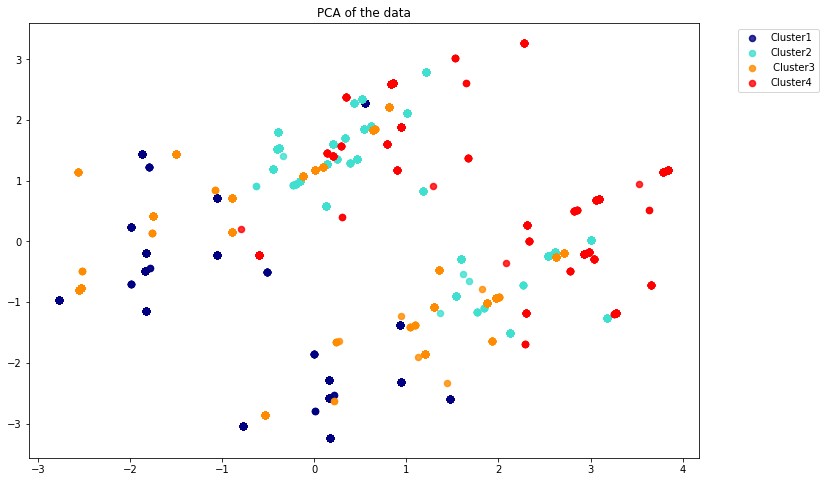

In [714]:
# Plotting the first two Principal Components 
plt.figure() # Initialise a Blank plot 
plt.figure(figsize=(12,8))
colors= ['navy', 'turquoise', 'darkorange', 'red']
lw=1.5
for color, i, target_names_1 in zip(colors, [0,1,2,3], target_names_1):
    plt.scatter(X_r_1[y_num_1==i,0], X_r_1[y_num_1==i,1], color=color, alpha=.8, lw=lw, label=target_names_1)    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.6)
plt.title('PCA of the data')
plt.show() 

 # EDA on the dataset for Regresssion 

In [715]:
data1.shape

(19863, 30)

In [716]:
data1.columns

Index(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Day_of_week', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'Cluster_id'],
      dtype='object')

# Finding the correlation between the features

In [717]:
# Extracting the week_number, month from the date series 
data1['month'] = pd.DatetimeIndex(data1['Date']).month
# extracting the week number
data1['week_number'] = data1['Date'].dt.isocalendar().week

<ipython-input-717-051670891475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['month'] = pd.DatetimeIndex(data1['Date']).month
<ipython-input-717-051670891475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['week_number'] = data1['Date'].dt.isocalendar().week


In [718]:
data1.columns

Index(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Day_of_week', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'Cluster_id', 'month',
       'week_number'],
      dtype='object')

In [719]:
# Creating dummies for Year, Day_of_week, week_number
data1_d1=pd.get_dummies(data1, columns=['month'], drop_first=True)
data1_d2=pd.get_dummies(data1_d1, columns=['Day_of_week'], drop_first=True)
data1_d3=pd.get_dummies(data1_d2, columns=['week_number'], drop_first=True)
data1_d4=pd.get_dummies(data1_d3, columns=['Year '])
data1_d5=pd.get_dummies(data1_d4, columns=['Cluster_id'])
data1_d5.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,Generic,Full_time_MBA,...,week_number_50,week_number_51,week_number_52,Year _1,Year _2,Year _3,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
0,mba,mba,MBA,2019-11-07,1,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
10,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,2,369,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
11,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,2,265,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
47,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,16,50,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
58,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,34,221,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [720]:
data1_d5.columns

Index(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Root_Unique_id', 'Unique_keyword_id', 'Broad_match',
       'Narrow_match', 'Generic', 'Full_time_MBA',
       ...
       'week_number_50', 'week_number_51', 'week_number_52', 'Year _1',
       'Year _2', 'Year _3', 'Cluster_id_0', 'Cluster_id_1', 'Cluster_id_2',
       'Cluster_id_3'],
      dtype='object', length=102)

In [731]:
df_full1=data1_d5.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date','Unclicked_Keywords','Cost', 'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Day_of_week_1','Root_Unique_id',
       'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4', 'Day_of_week_5',
       'Day_of_week_6', 'week_number_2', 'week_number_3', 'week_number_4',
       'week_number_5', 'week_number_6', 'week_number_7', 'week_number_8',
       'week_number_9', 'week_number_10', 'week_number_11', 'week_number_12',
       'week_number_13', 'week_number_14', 'week_number_15', 'week_number_16',
       'week_number_17', 'week_number_18', 'week_number_19', 'week_number_20',
       'week_number_21', 'week_number_22', 'week_number_23', 'week_number_24',
       'week_number_25', 'week_number_26', 'week_number_27', 'week_number_28',
       'week_number_29', 'week_number_30', 'week_number_31', 'week_number_32',
       'week_number_33', 'week_number_34', 'week_number_35', 'week_number_36',
       'week_number_37', 'week_number_38', 'week_number_39', 'week_number_40',
       'week_number_41', 'week_number_42', 'week_number_43', 'week_number_44',
       'week_number_45', 'week_number_46', 'week_number_47', 'week_number_48',
       'week_number_49', 'week_number_50', 'week_number_51', 'week_number_52'], axis=1)
df_full1.columns

Index(['Unique_keyword_id', 'Clicks', 'CPC', 'CTR', 'Return_on_ad_spend(ROAS)',
       'Conversion_rate_%', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Year _1', 'Year _2', 'Year _3', 'Cluster_id_0',
       'Cluster_id_1', 'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [732]:
# Finding the correlation between the features
corr1=df_full1.corr()
corr1 

,Unique_keyword_id,Clicks,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month_2,month_3,month_4,month_5,...,month_10,month_11,month_12,Year _1,Year _2,Year _3,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
Unique_keyword_id,1.000000,-0.230588,0.314641,0.189553,-0.021955,-0.038293,0.139955,0.005232,-0.031943,-0.038578,...,-0.091314,-0.004575,0.041557,0.397553,0.102948,-0.409342,-0.005743,0.083408,-0.119412,0.097380
Clicks,-0.230588,1.000000,-0.122931,-0.190923,-0.004997,-0.011246,0.017500,-0.010646,0.005015,0.002569,...,-0.009024,-0.045784,-0.014700,0.029871,0.032493,-0.052159,0.197013,-0.130319,-0.105854,-0.006373
CPC,0.314641,-0.122931,1.000000,-0.070328,-0.035649,-0.055815,0.017360,-0.034372,-0.024622,-0.040866,...,0.017967,0.075978,0.074447,0.115934,-0.032332,-0.065471,0.311635,0.101933,-0.379905,-0.020791
CTR,0.189553,-0.190923,-0.070328,1.000000,0.024463,0.058622,-0.005731,0.010523,-0.030481,-0.007665,...,-0.006029,0.013377,0.002607,-0.001488,0.040898,-0.034155,-0.397989,0.312001,0.153579,0.050583
Return_on_ad_spend(ROAS),-0.021955,-0.004997,-0.035649,0.024463,1.000000,0.202591,-0.014119,0.001281,-0.004520,-0.009233,...,0.013761,-0.001164,-0.000519,-0.018804,-0.015200,0.028292,-0.031789,0.010233,0.026401,-0.001371
Conversion_rate_%,-0.038293,-0.011246,-0.055815,0.058622,0.202591,1.000000,-0.032887,0.015867,-0.011968,0.000920,...,-0.014292,-0.012277,-0.013161,-0.034451,0.024324,0.006734,-0.069275,0.004122,0.070445,-0.002911
month_2,0.139955,0.017500,0.017360,-0.005731,-0.014119,-0.032887,1.000000,-0.150018,-0.143960,-0.145546,...,-0.092777,-0.112808,-0.127464,0.225309,0.055346,-0.229397,0.005187,-0.011885,-0.014551,0.026145
month_3,0.005232,-0.010646,-0.034372,0.010523,0.001281,0.015867,-0.150018,1.000000,-0.121299,-0.122635,...,-0.078173,-0.095051,-0.107400,-0.039068,0.177061,-0.121577,-0.014337,0.011265,-0.003822,0.015629
month_4,-0.031943,0.005015,-0.024622,-0.030481,-0.004520,-0.011968,-0.143960,-0.121299,1.000000,-0.117683,...,-0.075016,-0.091212,-0.103063,-0.170894,0.191913,-0.028190,-0.013555,0.023762,0.005314,-0.012254
month_5,-0.038578,0.002569,-0.040866,-0.007665,-0.009233,0.000920,-0.145546,-0.122635,-0.117683,1.000000,...,-0.075843,-0.092217,-0.104198,-0.172776,0.220673,-0.051534,-0.001632,0.018531,0.000735,-0.018142


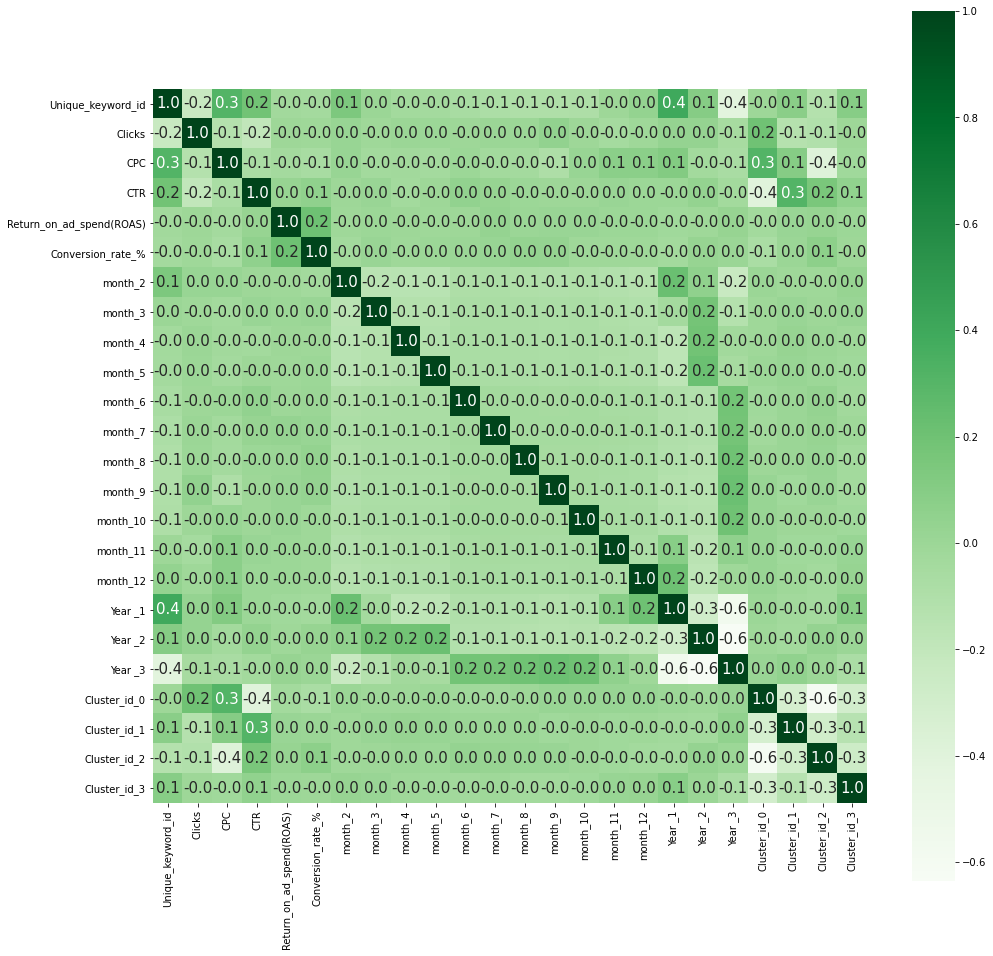

In [757]:
plt.figure(figsize=(16,16))
sns.heatmap(corr1, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

In [735]:
data1.head(5)
data1.shape

(19863, 32)

In [604]:
# Exporting the data to excel 
file_name = 'Clicked_keywords_2019-2022.xlsx'
data1.to_excel(file_name)

In [736]:
data1.columns

Index(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Day_of_week', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Clicks', 'Cost', 'CPC', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'Cluster_id', 'month',
       'week_number'],
      dtype='object')

In [563]:
#Segregating the data into three years -2019-20,2020-21,2021-22

In [564]:
df1=data1[data1['Year ']==1] # Data corresponding to 2019-20
df1.shape

(3984, 32)

In [565]:
df2=data1[data1['Year ']==2] # Data corresponding to 2020-21
df2.shape

(4849, 32)

In [566]:
df3=data1[data1['Year ']==3] # Data corresponding to 2021-22
df3.shape

(11030, 32)

 # Coorelation Matrix for individual years 

 # Coorelation Matrix: 2019-20

In [741]:
# Creating dummies for week_number and day_of_week, cluster_id
df1_d1=pd.get_dummies(df1, columns=['month'], drop_first=True)
df1_d2=pd.get_dummies(df1_d1, columns=['Day_of_week'], drop_first=True)
df1_d3=pd.get_dummies(df1_d2, columns=['Cluster_id'])

In [744]:
df1_cor= df1_d3.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id','Cost','week_number','Broad_match', 'Narrow_match', 'Generic',
       'Full_time_MBA', 'Part time', 'Exec_MBA ', 'Ranking ', 'TAMU_MBA ',
       ' TAMU_Exec_MBA ', 'TAMU_Online_MBA ', 'Competitors', 'PMBA ',
       'Weekedend_MBA ', 'Evening_MBA', 'Unclicked_Keywords'], axis=1)
df1_cor.columns

Index(['Unique_keyword_id', 'Clicks', 'CPC', 'CTR', 'Return_on_ad_spend(ROAS)',
       'Conversion_rate_%', 'month_2', 'month_3', 'month_11', 'month_12',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'Cluster_id_0', 'Cluster_id_1',
       'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [746]:
corr2=df1_cor.corr()
corr2 

,Unique_keyword_id,Clicks,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month_2,month_3,month_11,month_12,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
Unique_keyword_id,1.000000,-0.317474,0.494844,0.123980,-0.023922,-0.060988,0.004328,0.002214,0.009557,0.009575,-0.001844,0.008058,-0.014480,0.013218,-0.000219,-0.003216,-0.243349,0.075074,0.060139,0.170914
Clicks,-0.317474,1.000000,-0.201721,-0.206091,0.034500,0.009844,0.048477,0.022205,-0.077943,0.022526,0.000702,0.011514,0.024411,0.007997,-0.006223,-0.027042,-0.086799,0.062613,0.124100,-0.139406
CPC,0.494844,-0.201721,1.000000,-0.043482,-0.037761,-0.098114,-0.144788,-0.086397,0.112438,0.161588,0.014003,0.010425,-0.014683,-0.000731,-0.001813,-0.009786,-0.426067,-0.025679,0.288027,0.205535
CTR,0.123980,-0.206091,-0.043482,1.000000,0.016941,0.067319,-0.014958,0.015780,0.051408,-0.014036,0.013275,-0.000775,-0.021085,-0.000686,0.002464,0.006568,0.120220,0.050132,-0.326911,0.268357
Return_on_ad_spend(ROAS),-0.023922,0.034500,-0.037761,0.016941,1.000000,0.247831,0.005133,0.052293,-0.018963,-0.007022,0.005950,0.009665,0.021139,0.017219,-0.014327,-0.016626,0.017603,0.045277,-0.034808,-0.025931
Conversion_rate_%,-0.060988,0.009844,-0.098114,0.067319,0.247831,1.000000,0.004997,0.050514,-0.002375,-0.022459,0.012150,0.019660,-0.002627,0.001003,-0.021116,-0.028516,0.064636,0.065235,-0.097039,-0.022242
month_2,0.004328,0.048477,-0.144788,-0.014958,0.005133,0.004997,1.000000,-0.208783,-0.237115,-0.331927,-0.020098,-0.010911,0.005155,0.015197,-0.027219,0.026405,0.039833,-0.036126,-0.019520,0.015266
month_3,0.002214,0.022205,-0.086397,0.015780,0.052293,0.050514,-0.208783,1.000000,-0.109040,-0.152640,0.039478,0.010552,-0.032593,-0.029726,-0.011193,-0.057121,-0.000022,-0.035003,0.027360,-0.000337
month_11,0.009557,-0.077943,0.112438,0.051408,-0.018963,-0.002375,-0.237115,-0.109040,1.000000,-0.173353,-0.006744,-0.006615,-0.015346,-0.004343,0.044490,0.020996,-0.060457,0.038648,0.032755,-0.008714
month_12,0.009575,0.022526,0.161588,-0.014036,-0.007022,-0.022459,-0.331927,-0.152640,-0.173353,1.000000,0.035960,0.049796,-0.025543,-0.020221,-0.030781,0.006178,-0.061337,0.035159,0.042812,-0.018737


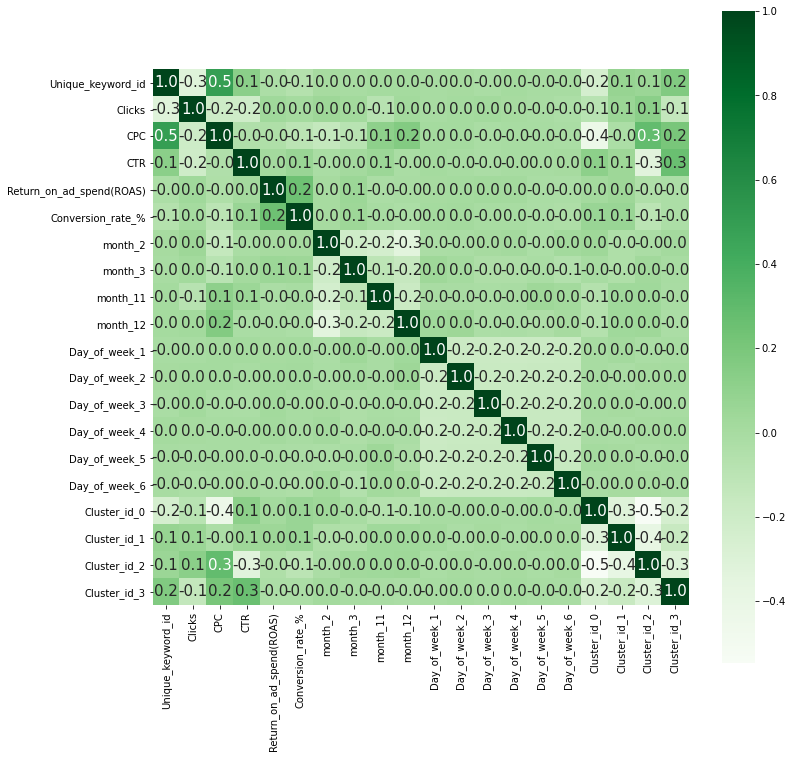

In [759]:
plt.figure(figsize=(12,12))
sns.heatmap(corr2, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

# Regression: 2019-20

In [973]:
df1.columns 
df1.head()

,All_networks_keywords,All_networks_keywords1,Keywords_cl,Date,Year,Day_of_week,Root_Unique_id,Unique_keyword_id,Broad_match,Narrow_match,...,Unclicked_Keywords,Clicks,Cost,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,Cluster_id,month,week_number
0,mba,mba,MBA,2019-11-07,1,4,1,1,1,0,...,0,5,77.15,15.43,0.089286,0.0,0.0,2,11,45
10,NaN,=+@executive +@mba,+EXECUTIVE +MBA,2019-11-07,1,4,2,369,0,1,...,0,1,18.77,18.77,0.052632,0.0,1.0,2,11,45
11,NaN,=+@emba +@ranking,+EMBA +RANKING,2019-11-07,1,4,2,265,0,1,...,0,1,11.77,11.77,0.333333,0.0,0.0,2,11,45
47,NaN,=+@a&@m +@mba,+A&M +MBA,2019-11-07,1,4,16,50,0,1,...,0,1,9.98,9.98,0.500000,0.0,0.0,0,11,45
58,NaN,=+@professional +@mba,+PROFESSIONAL +MBA,2019-11-07,1,4,34,221,0,1,...,0,1,19.77,19.77,0.055556,0.0,0.0,3,11,45


In [567]:
X1=df1.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Cost', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'month'], axis = 1)
#df2=X.drop(['CTR'], axis = 1)
Y1_1=df1['CTR'] # 1st dependent variable 
Y1_2=df1['Return_on_ad_spend(ROAS)'] # 2nd dependent variable 
Y1_3=df1['Conversion_rate_%'] # 3rd dependent variable       

In [568]:
X1.columns

Index(['Day_of_week', 'Clicks', 'CPC', 'Cluster_id', 'week_number'], dtype='object')

In [972]:
X1.head()

,Day_of_week,Clicks,CPC,Cluster_id,week_number
0,4,5,15.43,2,45
10,4,1,18.77,2,45
11,4,1,11.77,2,45
47,4,1,9.98,0,45
58,4,1,19.77,3,45


In [915]:
# Creating dummies for week_number and day_of_week
X1_d1=pd.get_dummies(X1, columns=['week_number'])
X1_d2=pd.get_dummies(X1_d1, columns=['Day_of_week'], drop_first=True)
X1_d3=pd.get_dummies(X1_d2, columns=['Cluster_id'])

In [916]:
X1_d3.columns

Index(['Clicks', 'CPC', 'week_number_1', 'week_number_2', 'week_number_3',
       'week_number_4', 'week_number_5', 'week_number_6', 'week_number_7',
       'week_number_8', 'week_number_9', 'week_number_10', 'week_number_11',
       'week_number_45', 'week_number_46', 'week_number_47', 'week_number_48',
       'week_number_49', 'week_number_50', 'week_number_51', 'week_number_52',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'Cluster_id_0', 'Cluster_id_1',
       'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [983]:
X1_sub= X1_d3[['Clicks', 'CPC','Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6']]
X1_sub.head()
X1_sub.shape

(3984, 8)

In [917]:
X1_d3.shape

(3984, 31)

In [1061]:
# Selecting specific columns of the dataframe 
X1_d3.shape

(3984, 31)

In [1062]:
#select columns with index positions in range 0 through 3
X_weeks=X1_d3.iloc[:, 2:21]
X_weeks.head()
X_weeks.shape

(3984, 19)

In [932]:
cluster_ids = X1_d3.iloc[:,27:31]
cluster_ids.head()

,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
0,0,0,1,0
10,0,0,1,0
11,0,0,1,0
47,1,0,0,0
58,0,0,0,1


In [1063]:
# Joining the cluster ids with the dataframe containing week numbers- Interaction 
X_weeks1 = X_weeks.join(cluster_ids)
X_weeks1.shape
#X_weeks1.columns
#X_weeks1.head

(3984, 23)

In [1007]:
# Running Linear Regression for 2019-2020 with CTR as dependent variable 
import statsmodels.api as sm

In [1008]:
X1_final = sm.add_constant(X1_d3)
model1_1 = sm.OLS(Y1_1,X1_final).fit()
model1_1

In [1009]:
print(model1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     28.58
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.24e-140
Time:                        19:29:00   Log-Likelihood:                -710.05
No. Observations:                3984   AIC:                             1480.
Df Residuals:                    3954   BIC:                             1669.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2877      0.012     23.

# Multiple Linear Regression using interaction of week numbers with the cluster_id 

In [935]:
from sklearn.preprocessing import PolynomialFeatures

In [960]:
#generating interaction terms
x_interaction1 = PolynomialFeatures(2, interaction_only=True, include_bias=False)
x_tr=x_interaction1.fit_transform(X_weeks1)

numpy.ndarray

In [970]:
df_interaction = pd.DataFrame(x_tr,columns=x_interaction1.get_feature_names())
df_interaction.head() 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18 x19,x18 x20,x18 x21,x18 x22,x19 x20,x19 x21,x19 x22,x20 x21,x20 x22,x21 x22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1016]:
file_name = 'interaction_columns.xlsx'
df_interaction.to_excel(file_name)
file_name = 'for_index.xlsx' # exporting the file for copying the index 
X_weeks1.to_excel(file_name)

In [1038]:
# Reading the excel file after getting the correct interaction terms 
df_interaction1 = pd.read_excel('/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Python_codes/interaction_columns_working.xlsx', index_col = 0)

In [1039]:
df_interaction1.head()

,week_number_1,week_number_2,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,week_number_10,...,week_number_50* cluster_id_2,week_number_50* cluster_id_3,week_number_51* cluster_id_0,week_number_51* cluster_id_1,week_number_51* cluster_id_2,week_number_51* cluster_id_3,week_number_52* cluster_id_0,week_number_52* cluster_id_1,week_number_52* cluster_id_2,week_number_52* cluster_id_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [999]:
X1_sub.columns
X1_sub.head()
X1_sub.shape

(3984, 8)

In [1042]:
# Joining the two dataframes 
X_interaction = X1_sub.join(df_interaction1)
X_interaction.shape
X_interaction.head()

,Clicks,CPC,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,week_number_1,week_number_2,...,week_number_50* cluster_id_2,week_number_50* cluster_id_3,week_number_51* cluster_id_0,week_number_51* cluster_id_1,week_number_51* cluster_id_2,week_number_51* cluster_id_3,week_number_52* cluster_id_0,week_number_52* cluster_id_1,week_number_52* cluster_id_2,week_number_52* cluster_id_3
0,5,15.43,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,18.77,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1,11.77,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,9.98,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,1,19.77,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Regression with CTR as the dependent variable- 2019-20 (Interaction)

In [1043]:
X_interaction_final = sm.add_constant(X_interaction)
modelint_1 = sm.OLS(Y1_1,X_interaction_final).fit()
modelint_1

In [1044]:
print(modelint_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     11.71
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.72e-133
Time:                        20:27:42   Log-Likelihood:                -645.81
No. Observations:                3984   AIC:                             1460.
Df Residuals:                    3900   BIC:                             1988.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1147]:
# Running Linear Regression for 2019-2020 with 'Return_on_ad_spend(ROAS)' as dependent variable 
model1_2 = sm.OLS(Y1_2,X1_final).fit()
output_CTR=model1_2.summary()
print(output_CTR)

                               OLS Regression Results                               
Dep. Variable:     Return_on_ad_spend(ROAS)   R-squared:                       0.012
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     1.628
Date:                      Thu, 14 Jul 2022   Prob (F-statistic):             0.0182
Time:                              09:51:49   Log-Likelihood:                -7886.0
No. Observations:                      3984   AIC:                         1.583e+04
Df Residuals:                          3954   BIC:                         1.602e+04
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [1148]:
output_CTR.to_excel('output_2019-20_CTR.xlsx')

AttributeError: 'Summary' object has no attribute 'to_excel'

In [652]:
# Running Linear Regression for 2019-2020 with 'Conversion_rate_%' as dependent variable 
model1_3 = sm.OLS(Y1_3,X1_final).fit()
print(model1_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.702
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           9.42e-11
Time:                        00:16:56   Log-Likelihood:                 1367.0
No. Observations:                3984   AIC:                            -2674.
Df Residuals:                    3954   BIC:                            -2485.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0640      0.012      5.

# Regression % Conversion as the dependent variable-2019-2020 (Interaction) 

In [ ]:
Y1_3=df1['Conversion_rate_%']

In [1092]:
modelint_2_con = sm.OLS(Y1_3,X_interaction_final).fit()
modelint_2_con

In [1093]:
print(modelint_2_con.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.136
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.51e-08
Time:                        13:18:09   Log-Likelihood:                 1402.2
No. Observations:                3984   AIC:                            -2636.
Df Residuals:                    3900   BIC:                            -2108.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

 # Coorelation Matrix: 2020-21

In [748]:
# Creating dummies for week_number and day_of_week, cluster_id
df2_d1=pd.get_dummies(df2, columns=['month'], drop_first=True)
df2_d2=pd.get_dummies(df2_d1, columns=['Day_of_week'], drop_first=True)
df2_d3=pd.get_dummies(df1_d2, columns=['Cluster_id'])

In [749]:
df2_cor= df2_d3.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id','Cost','week_number','Broad_match', 'Narrow_match', 'Generic',
       'Full_time_MBA', 'Part time', 'Exec_MBA ', 'Ranking ', 'TAMU_MBA ',
       ' TAMU_Exec_MBA ', 'TAMU_Online_MBA ', 'Competitors', 'PMBA ',
       'Weekedend_MBA ', 'Evening_MBA', 'Unclicked_Keywords'], axis=1)
df2_cor.columns

Index(['Unique_keyword_id', 'Clicks', 'CPC', 'CTR', 'Return_on_ad_spend(ROAS)',
       'Conversion_rate_%', 'month_2', 'month_3', 'month_11', 'month_12',
       'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6', 'Cluster_id_0', 'Cluster_id_1',
       'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [750]:
corr3=df2_cor.corr()
corr3

,Unique_keyword_id,Clicks,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month_2,month_3,month_11,month_12,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
Unique_keyword_id,1.000000,-0.317474,0.494844,0.123980,-0.023922,-0.060988,0.004328,0.002214,0.009557,0.009575,-0.001844,0.008058,-0.014480,0.013218,-0.000219,-0.003216,-0.243349,0.075074,0.060139,0.170914
Clicks,-0.317474,1.000000,-0.201721,-0.206091,0.034500,0.009844,0.048477,0.022205,-0.077943,0.022526,0.000702,0.011514,0.024411,0.007997,-0.006223,-0.027042,-0.086799,0.062613,0.124100,-0.139406
CPC,0.494844,-0.201721,1.000000,-0.043482,-0.037761,-0.098114,-0.144788,-0.086397,0.112438,0.161588,0.014003,0.010425,-0.014683,-0.000731,-0.001813,-0.009786,-0.426067,-0.025679,0.288027,0.205535
CTR,0.123980,-0.206091,-0.043482,1.000000,0.016941,0.067319,-0.014958,0.015780,0.051408,-0.014036,0.013275,-0.000775,-0.021085,-0.000686,0.002464,0.006568,0.120220,0.050132,-0.326911,0.268357
Return_on_ad_spend(ROAS),-0.023922,0.034500,-0.037761,0.016941,1.000000,0.247831,0.005133,0.052293,-0.018963,-0.007022,0.005950,0.009665,0.021139,0.017219,-0.014327,-0.016626,0.017603,0.045277,-0.034808,-0.025931
Conversion_rate_%,-0.060988,0.009844,-0.098114,0.067319,0.247831,1.000000,0.004997,0.050514,-0.002375,-0.022459,0.012150,0.019660,-0.002627,0.001003,-0.021116,-0.028516,0.064636,0.065235,-0.097039,-0.022242
month_2,0.004328,0.048477,-0.144788,-0.014958,0.005133,0.004997,1.000000,-0.208783,-0.237115,-0.331927,-0.020098,-0.010911,0.005155,0.015197,-0.027219,0.026405,0.039833,-0.036126,-0.019520,0.015266
month_3,0.002214,0.022205,-0.086397,0.015780,0.052293,0.050514,-0.208783,1.000000,-0.109040,-0.152640,0.039478,0.010552,-0.032593,-0.029726,-0.011193,-0.057121,-0.000022,-0.035003,0.027360,-0.000337
month_11,0.009557,-0.077943,0.112438,0.051408,-0.018963,-0.002375,-0.237115,-0.109040,1.000000,-0.173353,-0.006744,-0.006615,-0.015346,-0.004343,0.044490,0.020996,-0.060457,0.038648,0.032755,-0.008714
month_12,0.009575,0.022526,0.161588,-0.014036,-0.007022,-0.022459,-0.331927,-0.152640,-0.173353,1.000000,0.035960,0.049796,-0.025543,-0.020221,-0.030781,0.006178,-0.061337,0.035159,0.042812,-0.018737


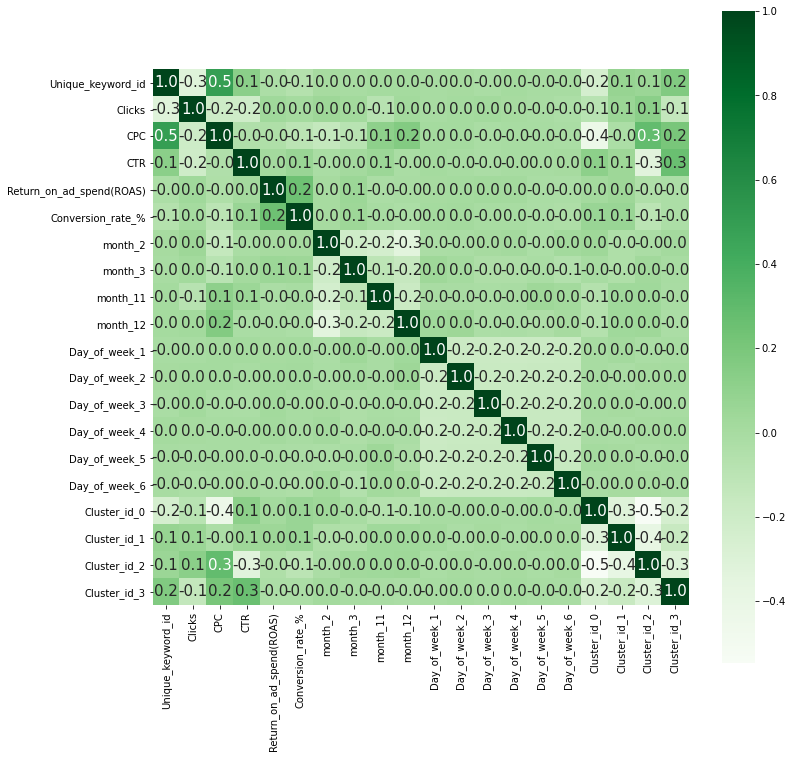

In [760]:
plt.figure(figsize=(12,12))
sns.heatmap(corr3, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

# 2. Regression: 2020-21

In [576]:
X2=df2.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Cost', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'month'], axis = 1)
#df2=X.drop(['CTR'], axis = 1)
Y2_1=df2['CTR'] # 1st dependent variable 
Y2_2=df2['Return_on_ad_spend(ROAS)'] # 2nd dependent variable 
Y2_3=df2['Conversion_rate_%'] # 3rd dependent variable 

In [643]:
# Creating dummies for week_number and day_of_week
X2_d1=pd.get_dummies(X2, columns=['week_number'], drop_first=True)
X2_d2=pd.get_dummies(X2_d1, columns=['Day_of_week'], drop_first=True)
X2_d3=pd.get_dummies(X2_d2, columns=['Cluster_id'])

In [644]:
X2_final = sm.add_constant(X2_d3)
model2_1 = sm.OLS(Y2_1,X2_final).fit()
print(model2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     51.29
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          2.53e-270
Time:                        23:45:34   Log-Likelihood:                -813.43
No. Observations:                4849   AIC:                             1691.
Df Residuals:                    4817   BIC:                             1898.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2501      0.017     14.

In [653]:
# Running Linear Regression for 2020-2021 with 'Return_on_ad_spend(ROAS)' as dependent variable 
model2_2 = sm.OLS(Y2_2,X2_final).fit()
print(model2_2.summary())

                               OLS Regression Results                               
Dep. Variable:     Return_on_ad_spend(ROAS)   R-squared:                       0.013
Model:                                  OLS   Adj. R-squared:                  0.007
Method:                       Least Squares   F-statistic:                     2.034
Date:                      Thu, 07 Jul 2022   Prob (F-statistic):           0.000617
Time:                              00:17:48   Log-Likelihood:                -11459.
No. Observations:                      4849   AIC:                         2.298e+04
Df Residuals:                          4817   BIC:                         2.319e+04
Df Model:                                31                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [654]:
# Running Linear Regression for 2020-2021 with 'Conversion_rate_%' as dependent variable 
model2_3 = sm.OLS(Y2_3,X2_final).fit()
print(model2_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.302
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.96e-09
Time:                        00:19:47   Log-Likelihood:                 539.96
No. Observations:                4849   AIC:                            -1016.
Df Residuals:                    4817   BIC:                            -808.4
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0882      0.013      6.

# Regression with interaction effect  (2020-21)

In [1079]:
X2_d3.head()
X2_d3.columns
X2_d3.shape

(4849, 32)

In [1080]:
X2_sub= X2_d3[['Clicks', 'CPC','Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6']]
X2_sub.head()

,Clicks,CPC,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6
17816,26,6.074615,1,0,0,0,0,0
17817,25,6.613200,1,0,0,0,0,0
17818,6,6.985000,1,0,0,0,0,0
17819,5,7.168000,1,0,0,0,0,0
17820,1,7.400000,1,0,0,0,0,0


In [1081]:
#select columns with index positions in range 0 through 3
X_weeks2=X2_d3.iloc[:, 2:21]
X_weeks2.head()
#X_weeks2.columns

,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,week_number_10,week_number_11,week_number_12,week_number_13,week_number_14,week_number_15,week_number_16,week_number_17,week_number_18,week_number_19,week_number_20,week_number_21
17816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17818,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1082]:
cluster_ids2 = X2_d3.iloc[:,28:32]
cluster_ids2.head()

,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
17816,0,0,1,0
17817,0,0,1,0
17818,0,0,1,0
17819,0,0,1,0
17820,0,0,1,0


In [1083]:
# Joining the cluster ids with the dataframe containing week numbers- Interaction 
X_weeks2 = X_weeks2.join(cluster_ids2)
X_weeks2.shape
X_weeks2.head()

,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,week_number_10,week_number_11,week_number_12,...,week_number_16,week_number_17,week_number_18,week_number_19,week_number_20,week_number_21,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
17816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1084]:
X_weeks2.columns

Index(['week_number_3', 'week_number_4', 'week_number_5', 'week_number_6',
       'week_number_7', 'week_number_8', 'week_number_9', 'week_number_10',
       'week_number_11', 'week_number_12', 'week_number_13', 'week_number_14',
       'week_number_15', 'week_number_16', 'week_number_17', 'week_number_18',
       'week_number_19', 'week_number_20', 'week_number_21', 'Cluster_id_0',
       'Cluster_id_1', 'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [1069]:
#generating interaction terms
x_interaction2 = PolynomialFeatures(2, interaction_only=True, include_bias=False)
x_tr2=x_interaction2.fit_transform(X_weeks2)

In [1070]:
df_interaction2 = pd.DataFrame(x_tr2,columns=x_interaction2.get_feature_names())
df_interaction2.head() 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x18 x19,x18 x20,x18 x21,x18 x22,x19 x20,x19 x21,x19 x22,x20 x21,x20 x22,x21 x22
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1071]:
file_name = 'interaction_columns2_2020-21.xlsx'
df_interaction2.to_excel(file_name)

In [1073]:
file_name = 'for_index2.xlsx' # exporting the file for copying the index 
X_weeks2.to_excel(file_name)

In [1098]:
# Reading the excel file after getting the correct interaction terms 
df_interaction2 = pd.read_excel('/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Python_codes/interaction_columns2_2020-21_working.xlsx', index_col = 0)

In [1099]:
df_interaction2.head()

,week_number3,week_number4,week_number5,week_number6,week_number7,week_number8,week_number9,week_number10,week_number11,week_number12,...,week_number_19* cluster_id_2,week_number_19* cluster_id_3,week_number_20 *cluster_id_0,week_number_20* cluster_id_1,week_number_20* cluster_id_2,week_number_20* cluster_id_3,week_number_21 *cluster_id_0,week_number_21* cluster_id_1,week_number_21 *cluster_id_2,week_number_21* cluster_id_3
17816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1100]:
X2_sub.columns
X2_sub.head()
#X2_sub.shape

,Clicks,CPC,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6
17816,26,6.074615,1,0,0,0,0,0
17817,25,6.613200,1,0,0,0,0,0
17818,6,6.985000,1,0,0,0,0,0
17819,5,7.168000,1,0,0,0,0,0
17820,1,7.400000,1,0,0,0,0,0


In [1101]:
# Joining the two dataframes 
X_interaction2 = X2_sub.join(df_interaction2)
X_interaction2.shape
X_interaction2.head()

,Clicks,CPC,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,week_number3,week_number4,...,week_number_19* cluster_id_2,week_number_19* cluster_id_3,week_number_20 *cluster_id_0,week_number_20* cluster_id_1,week_number_20* cluster_id_2,week_number_20* cluster_id_3,week_number_21 *cluster_id_0,week_number_21* cluster_id_1,week_number_21 *cluster_id_2,week_number_21* cluster_id_3
17816,26,6.074615,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17817,25,6.613200,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17818,6,6.985000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17819,5,7.168000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17820,1,7.400000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Regression with CTR as the dependent variable for 2020-21 (Interaction)

In [1102]:
X_interaction_final2 = sm.add_constant(X_interaction2)
modelint_2_CTR = sm.OLS(Y2_1,X_interaction_final2).fit()
modelint_2_CTR

In [1103]:
print(modelint_2_CTR.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     19.40
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.19e-247
Time:                        13:35:46   Log-Likelihood:                -769.44
No. Observations:                4849   AIC:                             1715.
Df Residuals:                    4761   BIC:                             2286.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Regression with % Conversion_Rate as the dependent variable for 2020-21 (Interaction)

In [1097]:
modelint_2_Conver = sm.OLS(Y2_3,X_interaction_final2).fit()
print(modelint_2_Conver.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.832
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           4.82e-06
Time:                        13:34:45   Log-Likelihood:                 568.82
No. Observations:                4849   AIC:                            -961.6
Df Residuals:                    4761   BIC:                            -390.8
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# 2021-22

# 1. Correlation Matrix:2021-22

In [753]:
# Creating dummies for week_number and day_of_week, cluster_id
df3_d1=pd.get_dummies(df3, columns=['month'], drop_first=True)
df3_d2=pd.get_dummies(df3_d1, columns=['Day_of_week'], drop_first=True)
df3_d3=pd.get_dummies(df3_d2, columns=['Cluster_id'])

In [754]:
df3_cor= df3_d3.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id','Cost','week_number','Broad_match', 'Narrow_match', 'Generic',
       'Full_time_MBA', 'Part time', 'Exec_MBA ', 'Ranking ', 'TAMU_MBA ',
       ' TAMU_Exec_MBA ', 'TAMU_Online_MBA ', 'Competitors', 'PMBA ',
       'Weekedend_MBA ', 'Evening_MBA', 'Unclicked_Keywords'], axis=1)
df3_cor.columns

Index(['Unique_keyword_id', 'Clicks', 'CPC', 'CTR', 'Return_on_ad_spend(ROAS)',
       'Conversion_rate_%', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6', 'Cluster_id_0',
       'Cluster_id_1', 'Cluster_id_2', 'Cluster_id_3'],
      dtype='object')

In [755]:
corr4=df3_cor.corr()
corr4

,Unique_keyword_id,Clicks,CPC,CTR,Return_on_ad_spend(ROAS),Conversion_rate_%,month_2,month_3,month_4,month_5,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
Unique_keyword_id,1.000000,-0.293224,0.205635,0.315088,-0.015013,-0.017487,-0.039991,0.011011,0.108858,0.123449,...,0.009875,0.017971,0.003948,0.000578,-0.018854,-0.025441,-0.057295,0.047909,-0.080058,0.148270
Clicks,-0.293224,1.000000,-0.100574,-0.156392,-0.008159,-0.011108,-0.042080,-0.043089,0.025106,0.032820,...,0.015744,0.005182,0.007402,0.002889,-0.003505,-0.020713,-0.085221,-0.035237,0.190841,-0.121090
CPC,0.205635,-0.100574,1.000000,-0.100987,-0.038010,-0.027040,0.042939,0.001735,-0.008396,-0.022590,...,0.020460,-0.000422,-0.000161,-0.004427,-0.012276,-0.002819,-0.359751,-0.056321,0.331119,0.070368
CTR,0.315088,-0.156392,-0.100987,1.000000,0.035144,0.048767,0.016828,-0.012311,-0.084904,-0.089815,...,-0.009348,0.003164,-0.010466,-0.002536,0.015410,0.002475,0.147458,0.059415,-0.417289,0.331583
Return_on_ad_spend(ROAS),-0.015013,-0.008159,-0.038010,0.035144,1.000000,0.218833,-0.007365,-0.003043,-0.008666,-0.011546,...,-0.002381,-0.001797,-0.003184,-0.000596,-0.007170,0.021752,0.029151,-0.002694,-0.038039,0.015855
Conversion_rate_%,-0.017487,-0.011108,-0.027040,0.048767,0.218833,1.000000,-0.017509,-0.001786,-0.040392,-0.039649,...,0.009878,-0.002572,-0.003953,0.019686,-0.006139,-0.007427,0.073245,-0.017257,-0.062922,0.003235
month_2,-0.039991,-0.042080,0.042939,0.016828,-0.007365,-0.017509,1.000000,-0.084296,-0.094826,-0.092392,...,0.009940,-0.000735,0.002784,-0.004967,0.005456,-0.009269,-0.033565,0.020024,0.014512,0.008346
month_3,0.011011,-0.043089,0.001735,-0.012311,-0.003043,-0.001786,-0.084296,1.000000,-0.095006,-0.092567,...,-0.015921,0.014719,0.017480,0.023345,-0.004924,-0.022988,-0.027855,0.033484,-0.015248,0.030808
month_4,0.108858,0.025106,-0.008396,-0.084904,-0.008666,-0.040392,-0.094826,-0.095006,1.000000,-0.104131,...,-0.015637,-0.023068,-0.000490,0.001092,0.017865,0.028987,-0.002391,-0.000602,-0.024104,0.037140
month_5,0.123449,0.032820,-0.022590,-0.089815,-0.011546,-0.039649,-0.092392,-0.092567,-0.104131,1.000000,...,0.021946,0.015065,-0.022064,-0.021807,-0.018265,-0.018869,-0.041290,0.001172,0.018784,0.028409


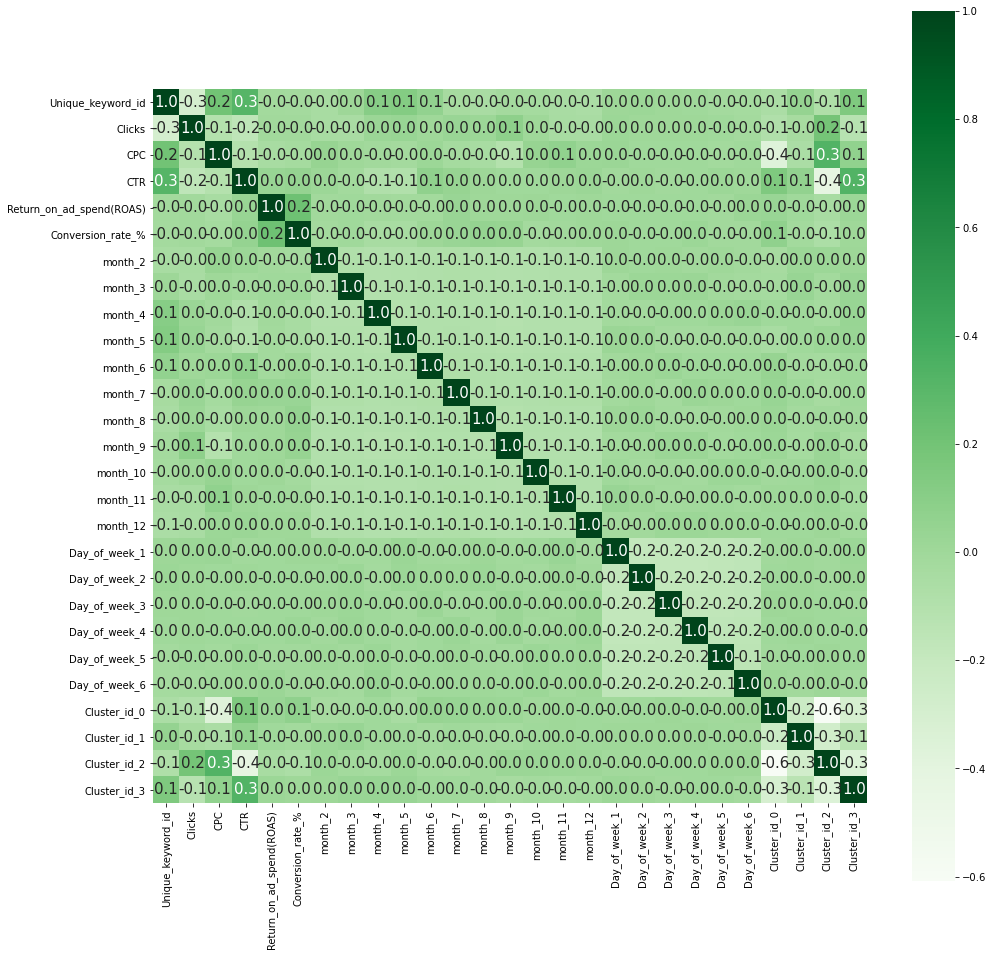

In [762]:
plt.figure(figsize=(16,16))
sns.heatmap(corr4, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens');

# 2. Regression: 2021-22

In [581]:
X3=df3.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Year ', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Cost', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'month'], axis = 1)
Y3_1=df3['CTR'] # 1st dependent variable 
Y3_2=df3['Return_on_ad_spend(ROAS)'] # 2nd dependent variable 
Y3_3=df3['Conversion_rate_%'] # 3rd dependent variable 

In [655]:
# Creating dummies for week_number and day_of_week
X3_d1=pd.get_dummies(X3, columns=['week_number'], drop_first=True)
X3_d2=pd.get_dummies(X3_d1, columns=['Day_of_week'], drop_first=True)
X3_d3=pd.get_dummies(X3_d2, columns=['Cluster_id'])

In [658]:
# Regression with CTR as the dependent variable 
X3_final = sm.add_constant(X3_d3)
model3_1 = sm.OLS(Y3_1,X3_final).fit()
print(model3_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     57.80
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:21:38   Log-Likelihood:                -544.34
No. Observations:               11030   AIC:                             1215.
Df Residuals:                   10967   BIC:                             1675.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2842      0.014     19.

In [659]:
# Running Linear Regression for 2021-2022 with 'Return_on_ad_spend(ROAS)' as dependent variable 
model3_2 = sm.OLS(Y3_2,X3_final).fit()
print(model3_2.summary())

                               OLS Regression Results                               
Dep. Variable:     Return_on_ad_spend(ROAS)   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     1.460
Date:                      Thu, 07 Jul 2022   Prob (F-statistic):             0.0108
Time:                              00:23:53   Log-Likelihood:                -41124.
No. Observations:                     11030   AIC:                         8.237e+04
Df Residuals:                         10967   BIC:                         8.283e+04
Df Model:                                62                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [660]:
# Running Linear Regression for 2021-2022 with '% Conversion Rate' as dependent variable 
model3_3 = sm.OLS(Y3_3,X3_final).fit()
print(model3_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.423
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.30e-18
Time:                        00:24:14   Log-Likelihood:                 983.89
No. Observations:               11030   AIC:                            -1842.
Df Residuals:                   10967   BIC:                            -1381.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0563      0.013      4.

# Regression  ( 2021-2022) : Interaction 

In [1141]:
X3_d3.head()
X3_d3.shape

(11030, 63)

In [1122]:
X3_d3.columns
X3_d3.head()

,Clicks,CPC,week_number_2,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
38236,9,10.530000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
38237,6,11.193333,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
38238,2,15.220000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
38239,2,10.945000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
38240,1,19.690000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [1136]:
X3_sub21_22= X3_d3[['Clicks', 'CPC','Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6']]
X3_sub21_22.head()

,Clicks,CPC,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6
38236,9,10.530000,0,1,0,0,0,0
38237,6,11.193333,0,1,0,0,0,0
38238,2,15.220000,0,1,0,0,0,0
38239,2,10.945000,0,1,0,0,0,0
38240,1,19.690000,0,1,0,0,0,0


In [1124]:
#select columns with week numbers only
X_weeks21_22_t=X3_d3.iloc[:, 2:59]
X_weeks21_22= X_weeks21_22_t.drop(['Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3', 'Day_of_week_4',
       'Day_of_week_5', 'Day_of_week_6'], axis=1)
X_weeks21_22.head()

,week_number_2,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,week_number_10,week_number_11,...,week_number_43,week_number_44,week_number_45,week_number_46,week_number_47,week_number_48,week_number_49,week_number_50,week_number_51,week_number_52
38236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1111]:
cluster_ids21_22 = X3_d3.iloc[:,59:63]
cluster_ids21_22.head()

,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
38236,0,0,1,0
38237,0,0,1,0
38238,0,0,1,0
38239,0,0,1,0
38240,0,0,1,0


In [1125]:
# Joining the cluster ids with the dataframe containing week numbers- Interaction 
X_weeks21_22 = X_weeks21_22.join(cluster_ids21_22)
X_weeks21_22.head()

,week_number_2,week_number_3,week_number_4,week_number_5,week_number_6,week_number_7,week_number_8,week_number_9,week_number_10,week_number_11,...,week_number_47,week_number_48,week_number_49,week_number_50,week_number_51,week_number_52,Cluster_id_0,Cluster_id_1,Cluster_id_2,Cluster_id_3
38236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
38240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1126]:
X_weeks21_22.columns

Index(['week_number_2', 'week_number_3', 'week_number_4', 'week_number_5',
       'week_number_6', 'week_number_7', 'week_number_8', 'week_number_9',
       'week_number_10', 'week_number_11', 'week_number_12', 'week_number_13',
       'week_number_14', 'week_number_15', 'week_number_16', 'week_number_17',
       'week_number_18', 'week_number_19', 'week_number_20', 'week_number_21',
       'week_number_22', 'week_number_23', 'week_number_24', 'week_number_25',
       'week_number_26', 'week_number_27', 'week_number_28', 'week_number_29',
       'week_number_30', 'week_number_31', 'week_number_32', 'week_number_33',
       'week_number_34', 'week_number_35', 'week_number_36', 'week_number_37',
       'week_number_38', 'week_number_39', 'week_number_40', 'week_number_41',
       'week_number_42', 'week_number_43', 'week_number_44', 'week_number_45',
       'week_number_46', 'week_number_47', 'week_number_48', 'week_number_49',
       'week_number_50', 'week_number_51', 'week_number_52',

In [1127]:
#generating interaction terms using Polynomialfeatures from the scikitlearn 
x_interaction21_22 = PolynomialFeatures(2, interaction_only=True, include_bias=False)
x_tr21_22=x_interaction21_22.fit_transform(X_weeks21_22)

In [1128]:
df_interaction21_22 = pd.DataFrame(x_tr21_22,columns=x_interaction21_22.get_feature_names())
df_interaction21_22.head() 

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x50 x51,x50 x52,x50 x53,x50 x54,x51 x52,x51 x53,x51 x54,x52 x53,x52 x54,x53 x54
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1129]:
# Exporting the interaction dataframe to excel to delete the columns with unnecessary interaction terms 
file_name = 'interaction_columns2_2021-2022.xlsx'
df_interaction21_22.to_excel(file_name)

In [1130]:
file_name = 'for_index_2021-2022.xlsx' # exporting the file for copying the index 
X_weeks21_22.to_excel(file_name)

In [1131]:
# Reading the excel file after getting the correct interaction terms 
df_interaction21_22 = pd.read_excel('/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Python_codes/interaction_columns2_2021-2022_working.xlsx',index_col = 0)

In [1140]:
df_interaction21_22.head()
df_interaction21_22.shape

(11030, 259)

In [1138]:
X3_sub21_22.columns

Index(['Clicks', 'CPC', 'Day_of_week_1', 'Day_of_week_2', 'Day_of_week_3',
       'Day_of_week_4', 'Day_of_week_5', 'Day_of_week_6'],
      dtype='object')

In [1139]:
# Joining the two dataframes 
X_interaction21_22 = X3_sub21_22.join(df_interaction21_22)
X_interaction21_22.shape

(11030, 267)

# Regression, CTR as dependent variable: 2021-2022  (Interaction)

In [1142]:
X_interaction_final21_22 = sm.add_constant(X_interaction21_22)
modelint_3_CTR = sm.OLS(Y3_1,X_interaction_final21_22).fit()
modelint_3_CTR

In [1143]:
print(modelint_3_CTR.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     20.27
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:37:05   Log-Likelihood:                -304.09
No. Observations:               11030   AIC:                             1022.
Df Residuals:                   10823   BIC:                             2535.
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Regression, % Conversion as dependent variable: 2021-2022  (Interaction)

In [1144]:
modelint_3_Conversion = sm.OLS(Y3_3,X_interaction_final21_22).fit()
print(modelint_3_Conversion.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.648
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           2.04e-08
Time:                        21:40:49   Log-Likelihood:                 1048.5
No. Observations:               11030   AIC:                            -1683.
Df Residuals:                   10823   BIC:                            -170.2
Df Model:                         206                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# Regression, ROAS as dependent variable: 2021-2022  (Interaction)

In [1145]:
modelint_3_ROAS = sm.OLS(Y3_2,X_interaction_final21_22).fit()
print(modelint_3_ROAS.summary())

                               OLS Regression Results                               
Dep. Variable:     Return_on_ad_spend(ROAS)   R-squared:                       0.035
Model:                                  OLS   Adj. R-squared:                  0.017
Method:                       Least Squares   F-statistic:                     1.908
Date:                      Wed, 13 Jul 2022   Prob (F-statistic):           1.83e-13
Time:                              21:42:01   Log-Likelihood:                -40972.
No. Observations:                     11030   AIC:                         8.236e+04
Df Residuals:                         10823   BIC:                         8.387e+04
Df Model:                               206                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

#  2019-2022

In [586]:
X=data1.drop(['All_networks_keywords', 'All_networks_keywords1', 'Keywords_cl',
       'Date', 'Root_Unique_id', 'Unique_keyword_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full_time_MBA', 'Part time',
       'Exec_MBA ', 'Ranking ', 'TAMU_MBA ', ' TAMU_Exec_MBA ',
       'TAMU_Online_MBA ', 'Competitors', 'PMBA ', 'Weekedend_MBA ',
       'Evening_MBA', 'Unclicked_Keywords', 'Cost', 'CTR',
       'Return_on_ad_spend(ROAS)', 'Conversion_rate_%', 'month'], axis = 1)
Y_1=data1['CTR'] # 1st dependent variable 
Y_2=data1['Return_on_ad_spend(ROAS)'] # 2nd dependent variable 
Y_3=data1['Conversion_rate_%'] # 3rd dependent variable 

In [662]:
# Creating dummies for week_number and day_of_week
X_d1=pd.get_dummies(X, columns=['week_number'], drop_first=True)
X_d2=pd.get_dummies(X_d1, columns=['Day_of_week'], drop_first=True)
X_d3=pd.get_dummies(X_d2, columns=['Year '])
X_d4=pd.get_dummies(X_d3, columns=['Cluster_id'])

In [663]:
X_d3.columns

Index(['Clicks', 'CPC', 'Cluster_id', 'week_number_2', 'week_number_3',
       'week_number_4', 'week_number_5', 'week_number_6', 'week_number_7',
       'week_number_8', 'week_number_9', 'week_number_10', 'week_number_11',
       'week_number_12', 'week_number_13', 'week_number_14', 'week_number_15',
       'week_number_16', 'week_number_17', 'week_number_18', 'week_number_19',
       'week_number_20', 'week_number_21', 'week_number_22', 'week_number_23',
       'week_number_24', 'week_number_25', 'week_number_26', 'week_number_27',
       'week_number_28', 'week_number_29', 'week_number_30', 'week_number_31',
       'week_number_32', 'week_number_33', 'week_number_34', 'week_number_35',
       'week_number_36', 'week_number_37', 'week_number_38', 'week_number_39',
       'week_number_40', 'week_number_41', 'week_number_42', 'week_number_43',
       'week_number_44', 'week_number_45', 'week_number_46', 'week_number_47',
       'week_number_48', 'week_number_49', 'week_number_50', 'wee

In [664]:
# Regression with CTR as dependent variable 
X_final = sm.add_constant(X_d4)
model_full = sm.OLS(Y_1,X_final).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     86.75
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:26:07   Log-Likelihood:                -2315.9
No. Observations:               19863   AIC:                             4762.
Df Residuals:                   19798   BIC:                             5275.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2251      0.009     25.

In [665]:
# Regression with ROAS as dependent variable 
model_full1 = sm.OLS(Y_2,X_final).fit()
print(model_full1.summary())

                               OLS Regression Results                               
Dep. Variable:     Return_on_ad_spend(ROAS)   R-squared:                       0.008
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     2.462
Date:                      Thu, 07 Jul 2022   Prob (F-statistic):           8.28e-10
Time:                              00:26:44   Log-Likelihood:                -68613.
No. Observations:                     19863   AIC:                         1.374e+05
Df Residuals:                         19798   BIC:                         1.379e+05
Df Model:                                64                                         
Covariance Type:                  nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [666]:
# Regression with % Conversion Rate as dependent variable 
model_full2 = sm.OLS(Y_3,X_final).fit()
print(model_full2.summary())

                            OLS Regression Results                            
Dep. Variable:      Conversion_rate_%   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.066
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           4.43e-36
Time:                        00:27:00   Log-Likelihood:                 2655.5
No. Observations:               19863   AIC:                            -5181.
Df Residuals:                   19798   BIC:                            -4668.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0482      0.007      7.

In [ ]:
####### Additional Analysis #######

# 2. Performing clustering on the bid_data (2019-2022)

In [100]:
# Importing the dataset
df_1 = pd.read_excel (r'/Users/sushantkumar/Documents/MAYS BUSINESS SCHOOL PROJECT/Downloaded_files_dropbox/2019-2022 data new/June1_2019-May31_2022/V3_Bid_Data_June1_2019-May31_2022_No_macros.xlsx') 
#place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'

In [101]:
df_1.head()

,All networks keywords,Keywords1,Keywords_cl,Root_Unique_id,Broad_match,Narrow_match,Generic,Full time MBA,Part time,Exec MBA,...,TAMU Online MBA,Competitors,PMBA,Weekedend MBA,Evening MBA,Unclicked_Keywords,Clicks,Cost,CPC,Unique_keyword_id
0,mba,mba,MBA,1,1,0,1,0,0,0,...,0,0,0,0,0,0,7373,49890.48,6.766646,1
1,NaN,=+@mba,+MBA,1,0,1,1,0,0,0,...,0,0,0,0,0,0,4400,28626.15,6.505943,13
2,mba university,mba university,MBA UNIVERSITY,1,1,0,1,0,0,0,...,0,0,0,0,0,0,3403,25226.49,7.413015,2
3,mays business school,mays business school,MAYS BUSINESS SCHOOL,52,1,0,0,0,0,0,...,0,0,0,0,0,0,2670,6896.67,2.583022,5
4,mba education,mba education,MBA EDUCATION,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1924,13012.26,6.763129,3


In [102]:
df_1.shape

(570, 23)

In [103]:
df_1.columns

Index(['All networks keywords', 'Keywords1', 'Keywords_cl', 'Root_Unique_id',
       'Broad_match', 'Narrow_match', 'Generic', 'Full time MBA', 'Part time',
       ' Exec MBA ', ' Ranking ', 'TAMU MBA ', ' TAMU Exec MBA ',
       ' TAMU Online MBA ', 'Competitors', 'PMBA ', 'Weekedend MBA ',
       'Evening MBA', 'Unclicked_Keywords', 'Clicks', 'Cost', 'CPC',
       'Unique_keyword_id'],
      dtype='object')

In [104]:
# Selecting the columns for which there is a click 
df_2 = df_1[df_1['Unclicked_Keywords'] == 0]
df_2.head()

,All networks keywords,Keywords1,Keywords_cl,Root_Unique_id,Broad_match,Narrow_match,Generic,Full time MBA,Part time,Exec MBA,...,TAMU Online MBA,Competitors,PMBA,Weekedend MBA,Evening MBA,Unclicked_Keywords,Clicks,Cost,CPC,Unique_keyword_id
0,mba,mba,MBA,1,1,0,1,0,0,0,...,0,0,0,0,0,0,7373,49890.48,6.766646,1
1,NaN,=+@mba,+MBA,1,0,1,1,0,0,0,...,0,0,0,0,0,0,4400,28626.15,6.505943,13
2,mba university,mba university,MBA UNIVERSITY,1,1,0,1,0,0,0,...,0,0,0,0,0,0,3403,25226.49,7.413015,2
3,mays business school,mays business school,MAYS BUSINESS SCHOOL,52,1,0,0,0,0,0,...,0,0,0,0,0,0,2670,6896.67,2.583022,5
4,mba education,mba education,MBA EDUCATION,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1924,13012.26,6.763129,3


In [105]:
df_2.shape

(394, 23)

In [ ]:
#Dropping some of the columns before clustering 

In [108]:
df_3=df_2.drop(['All networks keywords', 'Keywords1', 'Keywords_cl',
       'Broad_match', 'Narrow_match', 'Generic', 'Full time MBA', 'Part time',
       ' Exec MBA ', ' Ranking ', 'TAMU MBA ', ' TAMU Exec MBA ',
       ' TAMU Online MBA ', 'Competitors', 'PMBA ', 'Weekedend MBA ',
       'Evening MBA', 'Clicks', 'Cost','Unclicked_Keywords'], axis=1)

In [110]:
df_3.head()

,Root_Unique_id,CPC,Unique_keyword_id
0,1,6.766646,1
1,1,6.505943,13
2,1,7.413015,2
3,52,2.583022,5
4,1,6.763129,3


In [111]:
kmeans1 = KMeans(n_clusters=4, n_init=20, random_state=1001)
kmeans1.fit(df_3)
kmeans1.labels_ # returns the labels 
print('The Clusters are:', kmeans1.labels_)
print("The Inertia is:", kmeans1.inertia_) # Inertia is the within cluster sum of squares 

The Clusters are: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0 2 3 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 3 0 0 0 2 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 0 3
 2 0 2 1 0 3 2 0 2 2 3 3 0 3 3 0 0 0 3 0 0 3 3 0 3 3 0 3 0 3 1 3 3 3 3 2 3
 2 1 3 3 3 3 2 1 3 3 3 3 3 2 3 2 3 3 3 2 1 3 3 3 2 2 3 1 3 3 3 2 3 3 2 2 3
 3 2 2 1 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 1 1 3 3 3 3 2 3 3 2 2 3 3 3 3 3
 1 1 3 3 3 3 3 3 3 2 2 2 2 2 1 3 3 2 2 1 3 3 3 2 2 2 1 3 3 2 2 2 2 1 3 3 2
 2 2 1 1 1 3 3 3 3 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
The Inertia is: 507192.05776593793


In [112]:
no_of_clusters1=range(2,5)
inertia1= []
for a in no_of_clusters1:
    kmeans1=KMeans(n_clusters=a, n_init=20, random_state=1000)
    kmeans1=kmeans1.fit(df_3)
    u=kmeans1.inertia_
    inertia1.append(u)
    print("The inertia for", a, "Cluster is:", u)

The inertia for 2 Cluster is: 1911441.3297730319
The inertia for 3 Cluster is: 825564.898312838
The inertia for 4 Cluster is: 507201.50465013046


Text(0.5, 1.0, ' Scree Plot of Inertia_Score Vs No_of_clusters')

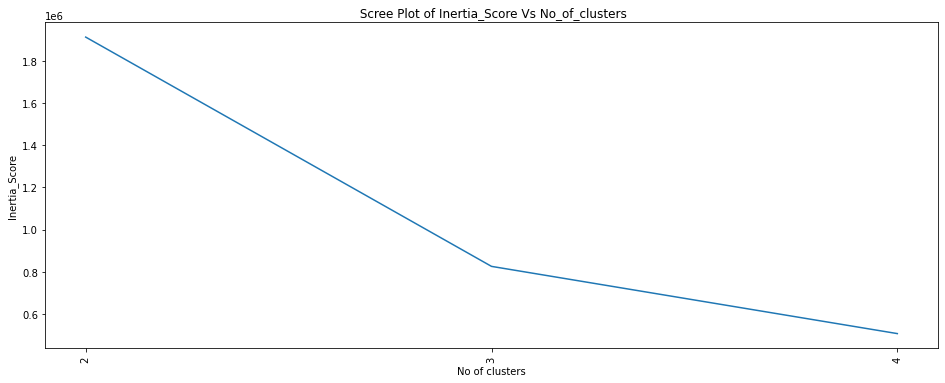

In [113]:
fig, (ax1)=plt.subplots(1,figsize=(16,6))
xx1=np.arange(len(no_of_clusters1))
ax1.plot(xx1,inertia1)
ax1.set_xticks(xx1)
ax1.set_xticklabels(no_of_clusters1,rotation="vertical")
plt.xlabel("No of clusters")
plt.ylabel("Inertia_Score")
plt.title(" Scree Plot of Inertia_Score Vs No_of_clusters")

In [115]:
df_2['cluster_id1'] = kmeans1.labels_.tolist()

<ipython-input-115-f488acb16f8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['cluster_id1'] = kmeans1.labels_.tolist()


In [116]:
unique, counts1=np.unique(kmeans1.labels_, return_counts= True)
counts1= counts1.reshape(1,4)
counts1

array([[ 98, 104,  92, 100]])

In [117]:
df_2.head()

,All networks keywords,Keywords1,Keywords_cl,Root_Unique_id,Broad_match,Narrow_match,Generic,Full time MBA,Part time,Exec MBA,...,Competitors,PMBA,Weekedend MBA,Evening MBA,Unclicked_Keywords,Clicks,Cost,CPC,Unique_keyword_id,cluster_id1
0,mba,mba,MBA,1,1,0,1,0,0,0,...,0,0,0,0,0,7373,49890.48,6.766646,1,1
1,NaN,=+@mba,+MBA,1,0,1,1,0,0,0,...,0,0,0,0,0,4400,28626.15,6.505943,13,1
2,mba university,mba university,MBA UNIVERSITY,1,1,0,1,0,0,0,...,0,0,0,0,0,3403,25226.49,7.413015,2,1
3,mays business school,mays business school,MAYS BUSINESS SCHOOL,52,1,0,0,0,0,0,...,0,0,0,0,0,2670,6896.67,2.583022,5,1
4,mba education,mba education,MBA EDUCATION,1,1,0,1,0,0,0,...,0,0,0,0,0,1924,13012.26,6.763129,3,1


# 2.Performing PCA and plotting the first two Principal Components 

In [119]:
# Scaling the data before we proceed with PCA 
scaler=StandardScaler()
scaler.fit(df_3)

StandardScaler()

In [121]:
df_3.scaled=scaler.transform(df_3)
type(df_3.scaled)

<ipython-input-121-77edbfc93265>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_3.scaled=scaler.transform(df_3)


numpy.ndarray

In [122]:
df_3.scaled.shape

(394, 3)

In [123]:
y_num1=kmeans1.labels_
target_names1=["Cluster1","Cluster2"," Cluster3","Cluster4"]
pca1=PCA(n_components=3, random_state=600) # Performing PCA on 5 components 
X_r1= pca1.fit(df_3.scaled).transform(df_3.scaled)  

In [124]:
# Percentage of Variance explained by the first two components 
print("Explained Variance Ratio (5 Principal Components: %s" % str(pca1.explained_variance_ratio_)) 

Explained Variance Ratio (5 Principal Components: [0.53159543 0.29346517 0.1749394 ]


In [125]:
# Cumulative proportion of variance (from PC1 to PC10)   
np.cumsum(pca1.explained_variance_ratio_)

array([0.53159543, 0.8250606 , 1.        ])

<Figure size 432x288 with 0 Axes>

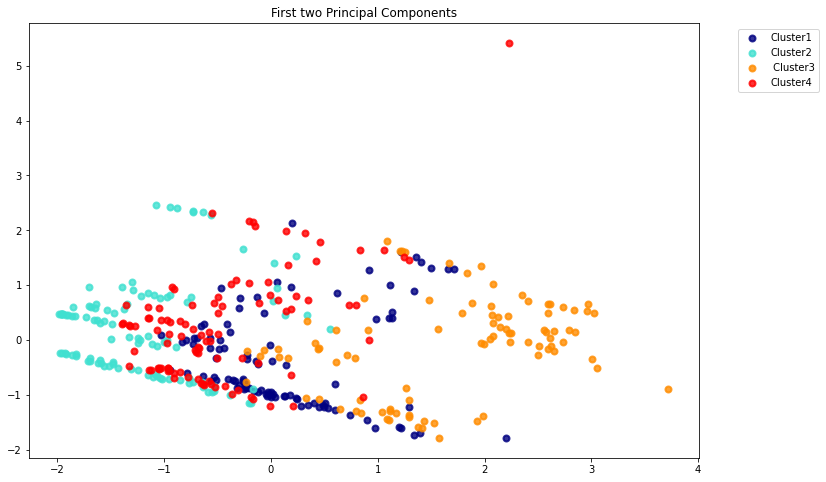

In [126]:
# Plotting the first two Principal Components 
plt.figure() # Initialise a Blank plot 
plt.figure(figsize=(12,8))
colors= ['navy', 'turquoise', 'darkorange','red']
lw=2
for color, i, target_names1 in zip(colors, [0,1,2,3], target_names1):
    plt.scatter(X_r1[y_num1==i,0], X_r1[y_num1==i,1], color=color, alpha=.8, lw=lw, label=target_names1)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.6)
plt.title('First two Principal Components')
plt.show()

In [ ]:
# Exporting the data to excel 

In [129]:
file_name = 'Bid_data1.xlsx'
df_2.to_excel(file_name)

In [36]:
# Dropping unwanted columns-Return_on_ad_spend(ROAS), Conversion_rate_%
data2=data1.drop(['Keywords_cl','Date','Return_on_ad_spend(ROAS)','Cost','Conversion_rate_%','Clicks','month','week_number'], axis=1)

In [38]:
data2.columns

Index(['Day_of_week', 'Unique_id', 'Broad_match', 'Exact_match', 'Generic',
       'Full_time_MBA', 'Part time', 'Exec_MBA ', 'Ranking ', 'TAMU_MBA ',
       ' TAMU_Exec_MBA ', 'TAMU_Online_MBA ', 'Competitors', 'PMBA ',
       'Weekedend_MBA ', 'Evening_MBA', 'CPC', 'CTR', 'year'],
      dtype='object')

In [39]:
# Finding the correlation between the features
corr1=data2.corr()
corr1 
# From the coorelation below; 
#1. There is a high coorelation between Cluster_id and Cluster_id1, Cluster_id and week_number

,Day_of_week,Unique_id,Broad_match,Exact_match,Generic,Full_time_MBA,Part time,Exec_MBA,Ranking,TAMU_MBA,TAMU_Exec_MBA,TAMU_Online_MBA,Competitors,PMBA,Weekedend_MBA,Evening_MBA,CPC,CTR,year
Day_of_week,1.000000,0.001179,-0.000568,0.000568,0.000215,-0.005440,0.000461,-0.000899,-0.006533,0.002004,-0.001746,-0.001147,-0.000296,-0.001414,0.002259,0.002555,-0.012366,-0.005981,-0.005549
Unique_id,0.001179,1.000000,-0.077202,0.077202,-0.374829,-0.007542,0.145275,-0.052519,-0.149859,0.150982,0.093027,-0.042355,0.484936,0.314943,-0.058239,0.166683,-0.044224,0.086675,-0.076613
Broad_match,-0.000568,-0.077202,1.000000,-1.000000,-0.036364,-0.076642,-0.072875,0.047909,0.032522,-0.030762,0.038201,0.079107,0.027626,-0.031570,-0.060216,-0.060707,0.018736,0.020132,0.362113
Exact_match,0.000568,0.077202,-1.000000,1.000000,0.036364,0.076642,0.072875,-0.047909,-0.032522,0.030762,-0.038201,-0.079107,-0.027626,0.031570,0.060216,0.060707,-0.018736,-0.020132,-0.362113
Generic,0.000215,-0.374829,-0.036364,0.036364,1.000000,0.096552,-0.098238,-0.355812,0.119598,-0.297213,-0.115034,-0.075023,-0.244863,-0.142836,-0.073207,-0.065286,0.023725,-0.134645,0.078699
Full_time_MBA,-0.005440,-0.007542,-0.076642,0.076642,0.096552,1.000000,-0.048633,-0.227440,-0.050796,-0.153019,-0.056948,-0.037141,0.114878,-0.127287,-0.036242,-0.032320,0.015834,-0.048149,-0.001718
Part time,0.000461,0.145275,-0.072875,0.072875,-0.098238,-0.048633,1.000000,-0.082845,0.044957,-0.073177,-0.020514,-0.013379,-0.048703,-0.045852,-0.013055,-0.011643,-0.005009,-0.036468,-0.182991
Exec_MBA,-0.000899,-0.052519,0.047909,-0.047909,-0.355812,-0.227440,-0.082845,1.000000,0.022951,-0.290917,0.031876,0.033755,0.150474,-0.216828,-0.061736,-0.055056,0.019172,-0.055433,0.081157
Ranking,-0.006533,-0.149859,0.032522,-0.032522,0.119598,-0.050796,0.044957,0.022951,1.000000,-0.186331,-0.067806,-0.016658,-0.160173,-0.104682,-0.029798,-0.035067,-0.120986,-0.113819,0.030313
TAMU_MBA,0.002004,0.150982,-0.030762,0.030762,-0.297213,-0.153019,-0.073177,-0.290917,-0.186331,1.000000,-0.085688,-0.055884,-0.179795,-0.055676,-0.054532,-0.048631,-0.053204,0.258798,0.013112
